# Classifier Decision Boundaries

**Learning Outcomes**

1. Learn how to use contour plots in order to draw decision boundaries
2. Learn how to overlay the dataset classes to visually examine the classifier performance
3. Guide a classifier hyperparameters selection and tuning via its decision boundaries
4. Examine the effect of the hyperparameters (tree depth, splits size and leaf size) on the tree
   performance
5. Optimise hyperparameters using Grid Search method
6. Utilise sklearn cross validation and grid search to find optimal hyperparameters.


## Decision Regions

### Introduction

In this notebook you will run code that allows you to visualise the decision boundaries of any classifier. We use a decision tree since this is the only classifier that we covered so far. However, you should be able to utilise this code later with any other classifier. The main restriction of this visualisation is that it can only apply to a 2d input since we are dealing with a 2d plots of two attributes and how to draw meaningful regions that represent the coloured areas where any point inside this area is going to be classified the same. Each colour corresponds to a class.

You can download a helper function [plotTreeBoundary](https://leeds365-my.sharepoint.com/:u:/g/personal/scsaalt_leeds_ac_uk/EaTUWYJVyhZPhqrFDClSq8QBvte3MCW8Bn47H_HBzxCvPg?e=Jiuex4) and store it in the same folder to be able to use it in the import below.

The following libraries are needed to create the plots

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Below is a helper function to plot the decision boundaries of any classifier (DT, kNN, Perceptron etc.), please do not worry too much about its details, you need to concentrate on the decision boundaries of the different trees as well as on the overfitting phenomena.

First download the dataset from [here](https://leeds365-my.sharepoint.com/:x:/g/personal/scsaalt_leeds_ac_uk/EU1FQ83g7YFJsITFam3YuIYBVPMaMV5xFKZjul6jJHA1rA?e=jAdo5D) and save to a subfolder called 'datasets' which must be created *inside the same folder of this notebook*.

Now load the data via pandas into a numpy array to be ready to pass to decision tree classifier object provided by sklearn

In [2]:
data = pd.read_csv('datasets/DTBoundaryC1C2_5.tsv', sep='\t').to_numpy()
X, y = data[:, [0,1]] , data[:, 2]
X1 = X[:,0]
X2 = X[:,1]

First we need to get the max and min of each attribute and we go a bit more(0.5) and a bit less(0.5) than these, respectively.

In [3]:
x_min, x_max = X1.min() - 0.5, X1.max() + 0.5
y_min, y_max = X2.min() - 0.5, X2.max() + 0.5

Now we create a meshgrid in order to cover a surface or area in the 2d
space that is formed by the two attributes X1 and X2
refinement_level = 0.1  represents the distances between one grid point
and the other

In [4]:
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))
# each point in xx and yy reprsents a point in the 2d space

Now to obtain all possible points we ravel xx and yy, i.e. we flatten them
into a simple vector using xx.ravel(), yy.ravel()‎
then we combine the two vectors into one matrix that have two column:
xx in the first column and yy in the second column

In [5]:
X12 = np.c_[xx.ravel(), yy.ravel()]

print(X12[:5,:5])
print(X12.shape)
print(xx.shape)
print(yy.shape)
yy.shape[0]*yy.shape[1]

[[-20.5         -0.37952567]
 [-20.4         -0.37952567]
 [-20.3         -0.37952567]
 [-20.2         -0.37952567]
 [-20.1         -0.37952567]]
(126690, 2)
(309, 410)
(309, 410)


126690

Now we use the classifier to predict the class which we represent as Z

Note that the points X12 of the mehsgrid do not necessarily correspond to
particular data points in the dataset, they constitute hypothetical
data points that would be classified by the classifier in a specific way

In [6]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(max_depth=8)
clf.fit(X, y)

DecisionTreeClassifier(max_depth=8)

Now we need to reshape the classification for all of these points on the surface into a 2d array that corresponds to xx or yy

In [7]:
Z = clf.predict(X12)
Z = Z.reshape(xx.shape)


**Plotting decision boundaries**
now we can plot the decision region of the classifier.
The surface area corresponds to the grid that we created using meshgrid
and the contours colours correspond to the predicted classes.
***This is the main trick in this function***.
The more refined the meshgrid is, the more refined and detailed the
coloured areas.


Text(0, 0.5, '$x_2$')

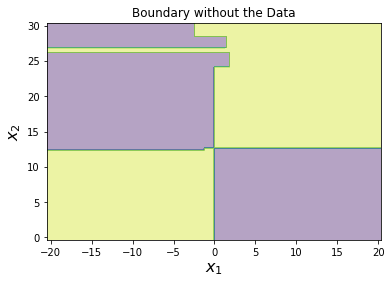

In [8]:
plt.contourf(xx, yy, Z, alpha=0.4)
plt.title('Boundary without the Data')
plt.xlabel('$x_1$', fontsize=16)
plt.ylabel('$x_2$', fontsize=16)

Change the tree depth to see the effect

Now we can overlay the different data points that we actually have in the
dataset to compare them with the decision regions

<ipython-input-9-4840543e6937>:5: UserWarning: You passed a edgecolor/edgecolors ('b') for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(X1[y == 0], X2[y == 0],     facecolors='b',


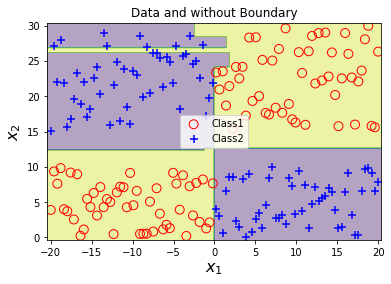

In [9]:
plt.contourf(xx, yy, Z, alpha=0.4) # comment this out to see the effect

plt.scatter(X1[y == 1], X2[y == 1],     facecolors='none',
           marker='o', edgecolor='r', s=80, label='Class1')
plt.scatter(X1[y == 0], X2[y == 0],     facecolors='b',
           marker='+', edgecolor='b', s=80, label='Class2')

plt.title('Data and without Boundary')
plt.xlabel('$x_1$', fontsize=16)
plt.ylabel('$x_2$', fontsize=16)
plt.legend()

Let us put everything together in one function.
The full code is below and we will use this function in this and other exercises. We have saved this in .py file so that it can be imported later, we will see an example in another notebook. For now let us focus on how to take advantage of the boundaries.

In [10]:
# Disclaimer: this function has been adopted and modified from a sklearn function
# Plotting classifier decision boundaries
# Decision Regions
# Below is a helper function to plot the decision boundaries of
# any classifier (DT, KNN, Perceptron etc)

def plotTreeBoundary(clf, X1, X2, y, ax, title='Classes Boundaries',
                     fontsize=None, psize=100):
    # clf is the classifier
    # X1 and X2 are the two attributes that constitute the input space in 2d
    # (we cannot plot decision regions in more than 2d)
    # y is the class vector of these records [X1, x2]
    # the rest of the input parameters are self-explanatory.

    # first we need to get the max and min of each attribute and we go a
    # bit more(0.5) and a bit less(0.5) than these, respectively.
    x_min, x_max = X1.min() - 0.5, X1.max() + 0.5
    y_min, y_max = X2.min() - 0.5, X2.max() + 0.5

    # now we create a meshgrid in order to cover a surface or area in the 2d
    # space that is formed by the two attributes X1 and X2
    # refinement_level = 0.1 reprsents the distances between one grid point
    # and the other.
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))
    # each point in xx and yy reprsents a point in the 2d space

    # to obtain all possible points, we ravel xx and yy, i.e. we flatten them
    # into a simple vector using xx.ravel(), yy.ravel()
    # then we combine the two vectors into one matrix that have two columns,
    # xx in the first column and yy in the second column
    X12 = np.c_[xx.ravel(), yy.ravel()]

    # now we use the classifier to predict the class which we represent as Z
    Z = clf.predict(X12)
    # note that the points X12 of the mehsgrid do not necessarily correspond to
    # particular datapoints in the dataset, they constitute hypothetical
    # datapoints that would be classified by the classifier in a specific way

    # now we need to reshape the classificaiton for all of these points on the
    # surface into a 2d array that corresponds to xx or yy
    Z = Z.reshape(xx.shape)

    # **plotting decision boundaries**
    # now we can plot the decision region of the classifer
    # the surface area correspond to the grid that we created using meshgrid
    # and the contours colours correspond with the predicted classes.
    # The more refined the meshgrid is, the more refined and detailed the
    # coloured areas.

    ax.contourf(xx, yy, Z, alpha=0.4)

    # now we can plot the different data points that we actually have in the
    # dataset to compare them with the decision regions
    ax.scatter(X1[y == 1], X2[y == 1],     facecolors='none',
               marker='o', edgecolor='r', s=0.8*psize, label='Class1')
    ax.scatter(X1[y == 0], X2[y == 0],     facecolors='b',
               marker='+', edgecolor='b', s=1.0*psize, label='Class2')
    # The above two lines can be replaced by the below
    # (but you will not be able to change the marker though)
    # ax.scatter(X1, X2, c=Y, edgecolor='k')

    # set title and labels and show the legend for the plot
    ax.set_title(title)
    ax.set_xlabel('$x_1$', fontsize=16)
    ax.set_ylabel('$x_2$', fontsize=16)
    ax.legend()

Ok, so now we are ready to utilise the boundary function that we have developed.

## Decision Boundaries to Guide the Process of  Model Fitting

In [11]:
from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier
from itertools import product

Now we try our decision  boundary function on a decision tree

If you have not done it yet, please download the dataset from [here](https://leeds365-my.sharepoint.com/:x:/g/personal/scsaalt_leeds_ac_uk/EU1FQ83g7YFJsITFam3YuIYBVPMaMV5xFKZjul6jJHA1rA?e=jAdo5D) and save to a subfolder called 'datasets' which must be created *inside the same folder of this notebook*.

Now load the data via pandas into a numpy array to be ready to pass to decision tree classifier object provided by sklearn

In [12]:
data = pd.read_csv('datasets/DTBoundaryC1C2_5.tsv', sep="\t").to_numpy()
X, y = data[:, [0,1]] , data[:, 2]


Now let us create and fit the DT model

In [13]:
clf = DecisionTreeClassifier(max_depth=7)
clf.fit(X, y)

DecisionTreeClassifier(max_depth=7)

<ipython-input-10-b8d411288f06>:56: UserWarning: You passed a edgecolor/edgecolors ('b') for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(X1[y == 0], X2[y == 0],     facecolors='b',


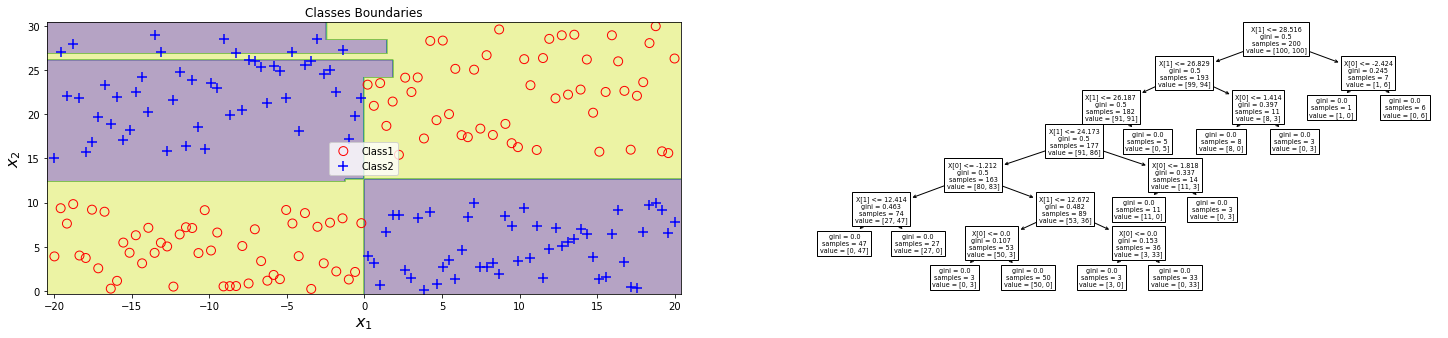

In [14]:
fig , ax = plt.subplots(1, 2, figsize=(25, 5))

plotTreeBoundary(clf, X[:,0], X[:,1], y, ax=ax[0])   
plot_tree(clf)

plt.show()

In the above figure, the yellow region represents the negative class and blue region represents the positive class.

### Reflection

As you can see the DT has not done a great job in terms of classifying this dataset. 
You should now reflect and think why this is the case before you move to the next sections. Try to vary the depth to see if that helps.


### Interpreting the results

The reason for the above issue is that the DT **hyper parameters** need adjustment in order to suit the dataset. This is an important step in any model fitting process and often it is a trial and error-based process that is done either manually or automatically. 

- By using hyper parameters optimisation procedure we can choose the best set of hyper parameters but it is computationally an expensive process. 

- For this small dataset you will not notice a long processing time, but for larger datasets it can take days to run an optimiser to come up with a best hyper parameter settings especially if we are employing a Grid Search methods on a number of hyper parameters. The cost grows exponentially! so we have to be mindful when we add a hyper parameter that we really need it.

Below we will explore the effect of max_depth and then we can adjust other parameters such as the min_samples_leaf and min_sample_split of the tree.

## Varying the Decision Tree Depth

Now let us try the depth of the tree and see the effect on the decision boundaries. To do so we take the previous cell code and we convert it to a function and we pass the max_depth to it. Then we loop through several depths and we call the new function accordingly.

**Task for you** ideally we should pass X and y as well. we leave this task for you.

In [15]:
def fit_plot_DT(max_depth):
    clf = DecisionTreeClassifier(max_depth=max_depth)
    clf.fit(X, y)

    _, ax = plt.subplots(1, 2, figsize=(25, 5))

    plotTreeBoundary(clf, X[:,0], X[:,1], y, ax=ax[0], title='depth'+str(d),  fontsize=10)    
    plot_tree(clf)

    plt.show()

Ok, now we are ready to vary the depth

<ipython-input-10-b8d411288f06>:56: UserWarning: You passed a edgecolor/edgecolors ('b') for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(X1[y == 0], X2[y == 0],     facecolors='b',


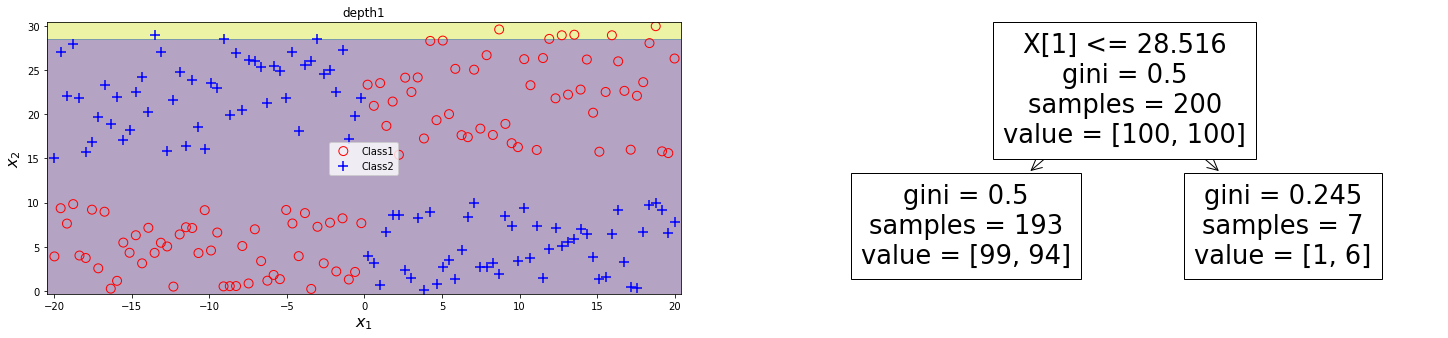

<ipython-input-10-b8d411288f06>:56: UserWarning: You passed a edgecolor/edgecolors ('b') for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(X1[y == 0], X2[y == 0],     facecolors='b',


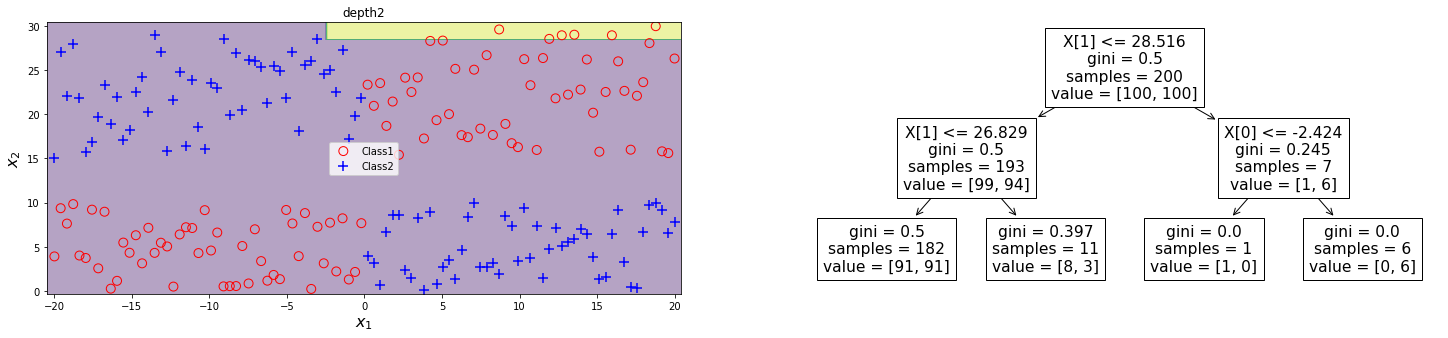

<ipython-input-10-b8d411288f06>:56: UserWarning: You passed a edgecolor/edgecolors ('b') for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(X1[y == 0], X2[y == 0],     facecolors='b',


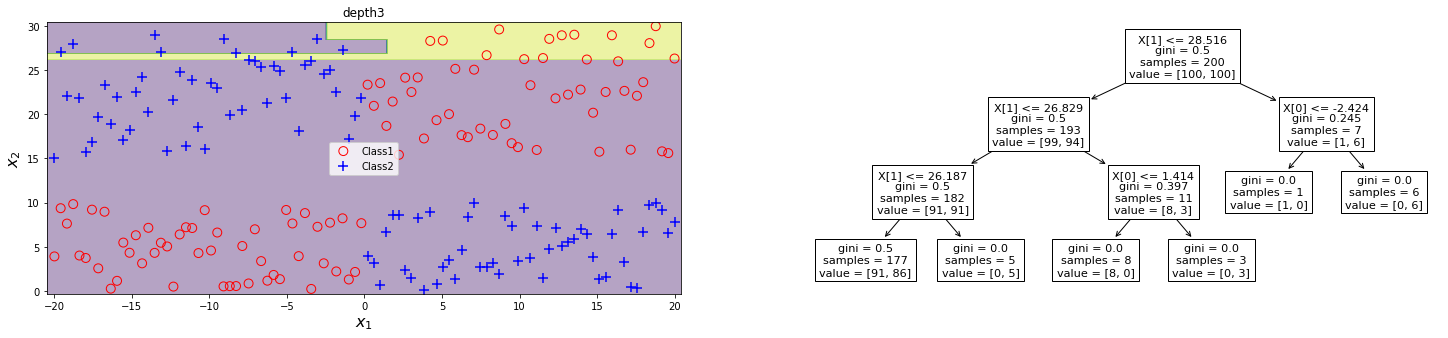

<ipython-input-10-b8d411288f06>:56: UserWarning: You passed a edgecolor/edgecolors ('b') for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(X1[y == 0], X2[y == 0],     facecolors='b',


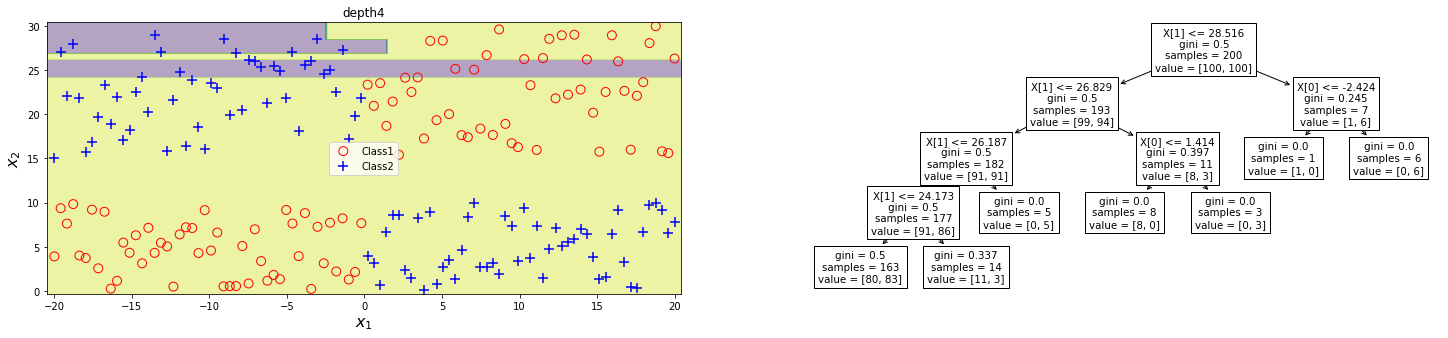

<ipython-input-10-b8d411288f06>:56: UserWarning: You passed a edgecolor/edgecolors ('b') for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(X1[y == 0], X2[y == 0],     facecolors='b',


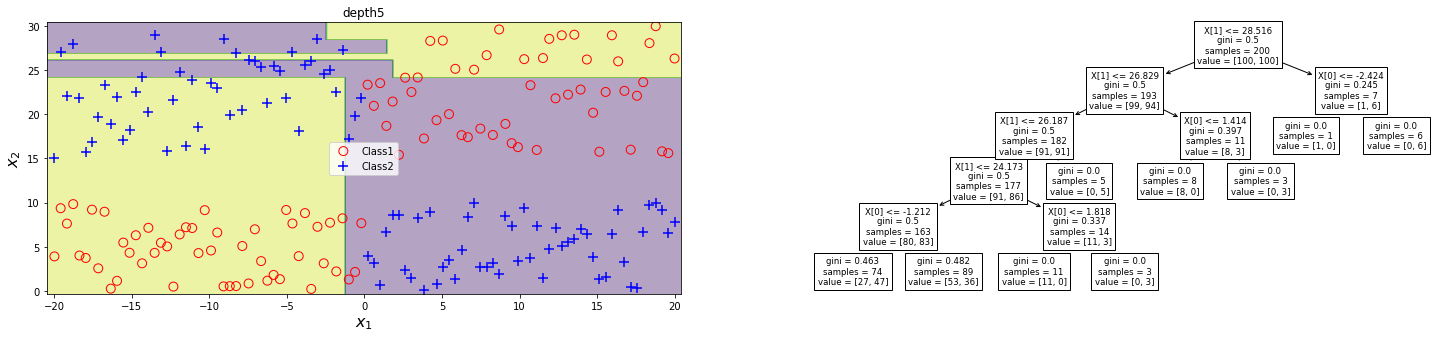

<ipython-input-10-b8d411288f06>:56: UserWarning: You passed a edgecolor/edgecolors ('b') for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(X1[y == 0], X2[y == 0],     facecolors='b',


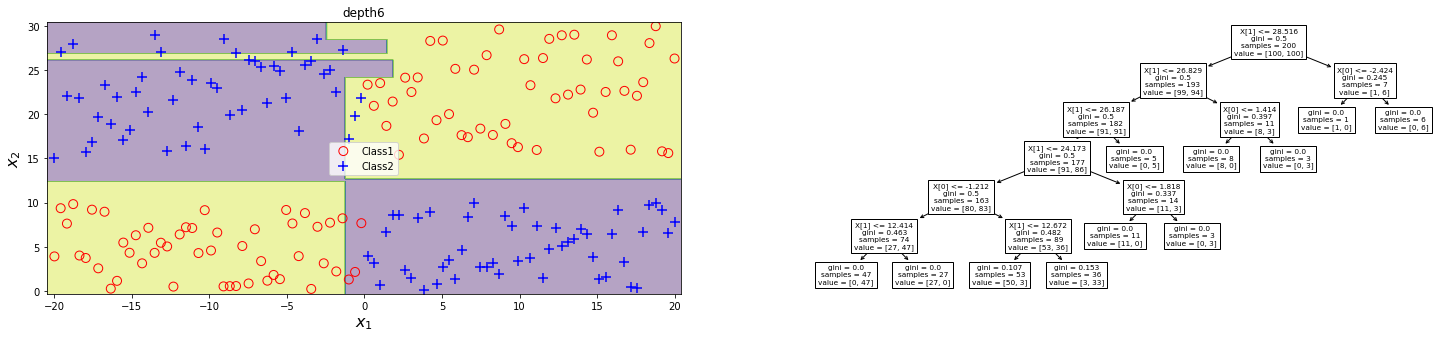

In [16]:
max_depths = [1, 2, 3, 4, 5, 6]
for d in max_depths:
    fit_plot_DT(max_depth=d)

### Interpreting the results

As we can see the decision tree classifier performed better job when we increased the max_depth of the tree. 

But there are some evidence of overfitting where the boundaries started to take irregular shapes unnecessary for this dataset and this can be improved.

There is some misclassification around the boundaries and the depth seems excessive for such simple dataset.


### Reflection
Ok again it is time to reflect. Think how we can improve the situation further. We know that a DT can classify this type of dataset because the classes’ boundaries are rectilinear.

The dataset is divided into four quarters. It is non-linearly separable but rectilinearly separable. So a depth of 4 should be enough for it to be classified.

Below we will explore the effect of max_depth combined with the min_samples_leaf and min_sample_split hyper parameters.
We will see that we do not need more than a depth of 4 if we adjust the other two variables suitably.


In [17]:
from sklearn.metrics import accuracy_score

def fit_plot_DT(max_depth, min_leaf, min_split, min_impurity, plot=False):
    
    clf = DecisionTreeClassifier(max_depth=max_depth, min_samples_leaf=min_leaf,
                                 min_samples_split=min_split, min_impurity_decrease=min_impurity)
    clf.fit(X, y)
    accuracy= accuracy_score(y,clf.predict(X))#, normalize=False)
    
    if plot:
        _, ax = plt.subplots(1, 2, figsize=(20, 5))

        plotTreeBoundary(clf, X[:,0], X[:,1], y, ax=ax[0], title='depth'+str(d),  fontsize=10)    
        plot_tree(clf)
        plt.show()
        
    return accuracy, clf

### Grid Search
Below we implement our own Grid Search

In [53]:
# the below paramters can be replaced by np.arange(1,k) we show explicit numbers 
# to be able to change these and experiement easily
max_depths   = [1,  2,   3,  4,  5,  6,  8,  9,  10,  12,  13,  14, 15] 
min_leafs    = [5,  10, 20, 30, 40, 50, 60, 70 ]                        
min_splits   = [10, 20, 30, 40, 50, 60, 70 ]                            
min_impurity = [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.2, 0.5, 0.9]
max_accuracy = 0
clf =[]
for d in max_depths:
    for f in min_leafs:
        for s in min_splits:
            for i in min_impurity:
                accuracy,clf = fit_plot_DT(max_depth=d, min_leaf=f, min_split=s, min_impurity= i)
                #print(accuracy)
                if accuracy >= max_accuracy: 
                    max_accuracy = accuracy
                    max_d    = d
                    min_f    = f
                    min_s    = s
                    min_i    = i
print('max_accuracy={}, max_depth={}, min_leaf={}, min_split={}, min_impurity={}'.format(
       max_accuracy,    max_d,        min_f,       min_s,        min_i))


max_accuracy=0.955, max_depth=15, min_leaf=5, min_split=10, min_impurity=0.005


### study the effect of min_sample_leaf

1 0.995


<ipython-input-32-b8d411288f06>:56: UserWarning: You passed a edgecolor/edgecolors ('b') for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(X1[y == 0], X2[y == 0],     facecolors='b',


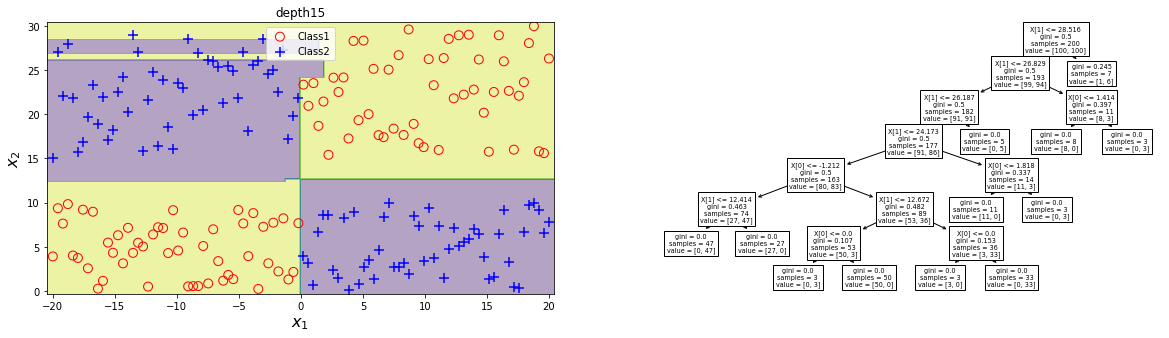

2 0.995


<ipython-input-32-b8d411288f06>:56: UserWarning: You passed a edgecolor/edgecolors ('b') for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(X1[y == 0], X2[y == 0],     facecolors='b',


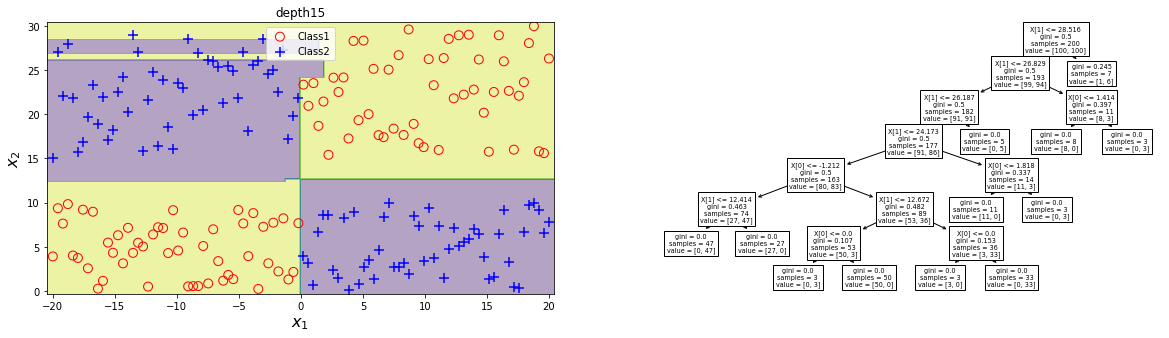

3 0.995


<ipython-input-32-b8d411288f06>:56: UserWarning: You passed a edgecolor/edgecolors ('b') for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(X1[y == 0], X2[y == 0],     facecolors='b',


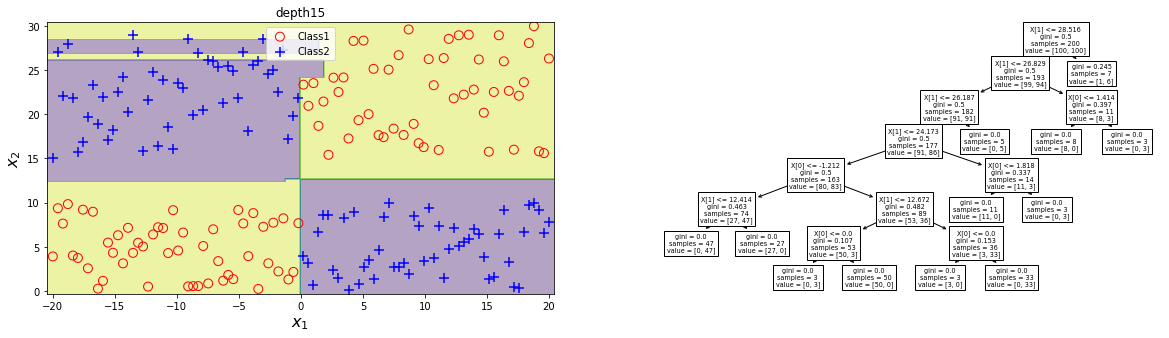

4 0.975


<ipython-input-32-b8d411288f06>:56: UserWarning: You passed a edgecolor/edgecolors ('b') for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(X1[y == 0], X2[y == 0],     facecolors='b',


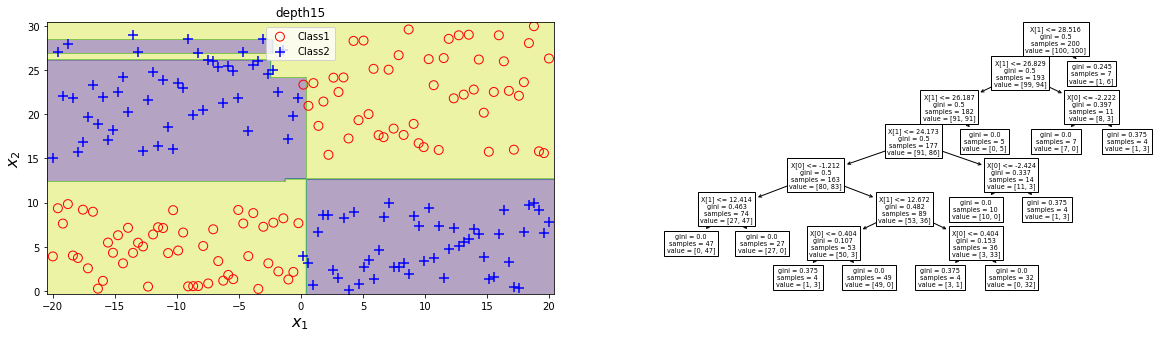

5 0.955


<ipython-input-32-b8d411288f06>:56: UserWarning: You passed a edgecolor/edgecolors ('b') for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(X1[y == 0], X2[y == 0],     facecolors='b',


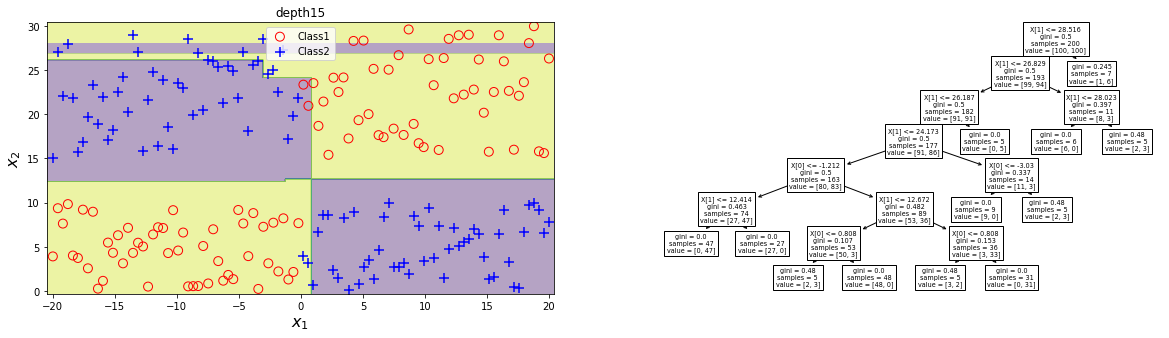

6 0.975


<ipython-input-32-b8d411288f06>:56: UserWarning: You passed a edgecolor/edgecolors ('b') for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(X1[y == 0], X2[y == 0],     facecolors='b',


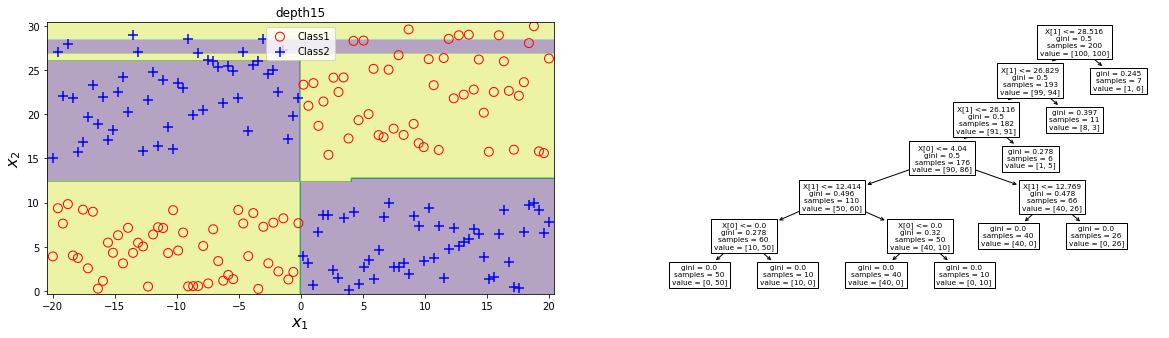

7 0.97


<ipython-input-32-b8d411288f06>:56: UserWarning: You passed a edgecolor/edgecolors ('b') for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(X1[y == 0], X2[y == 0],     facecolors='b',


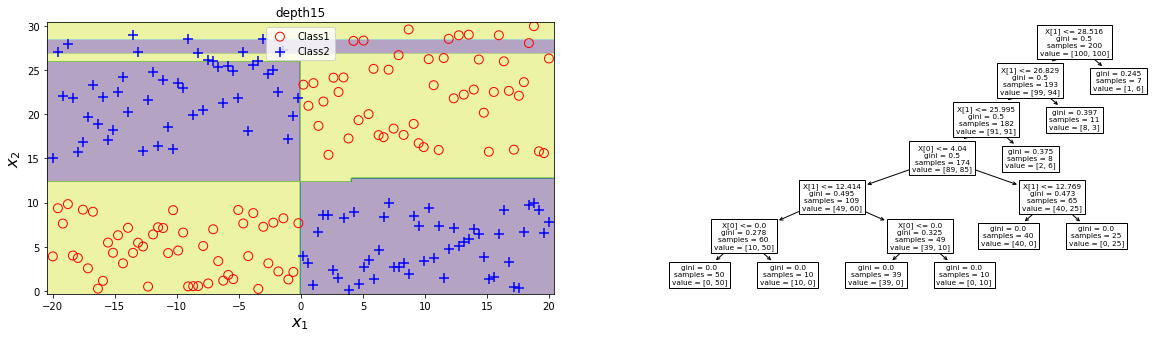

8 0.955


<ipython-input-32-b8d411288f06>:56: UserWarning: You passed a edgecolor/edgecolors ('b') for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(X1[y == 0], X2[y == 0],     facecolors='b',


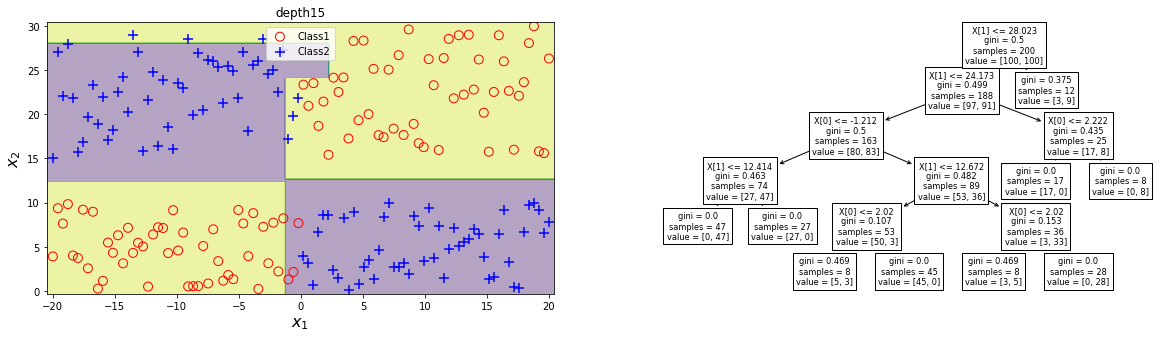

9 0.95


<ipython-input-32-b8d411288f06>:56: UserWarning: You passed a edgecolor/edgecolors ('b') for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(X1[y == 0], X2[y == 0],     facecolors='b',


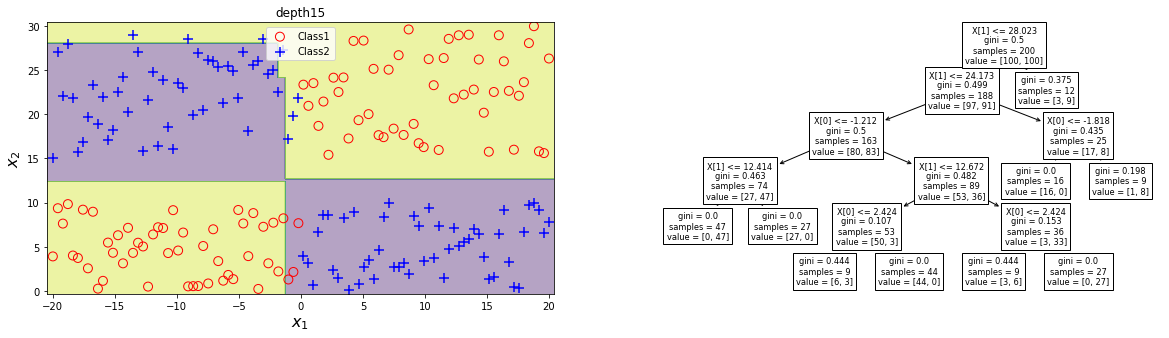

10 0.945


<ipython-input-32-b8d411288f06>:56: UserWarning: You passed a edgecolor/edgecolors ('b') for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(X1[y == 0], X2[y == 0],     facecolors='b',


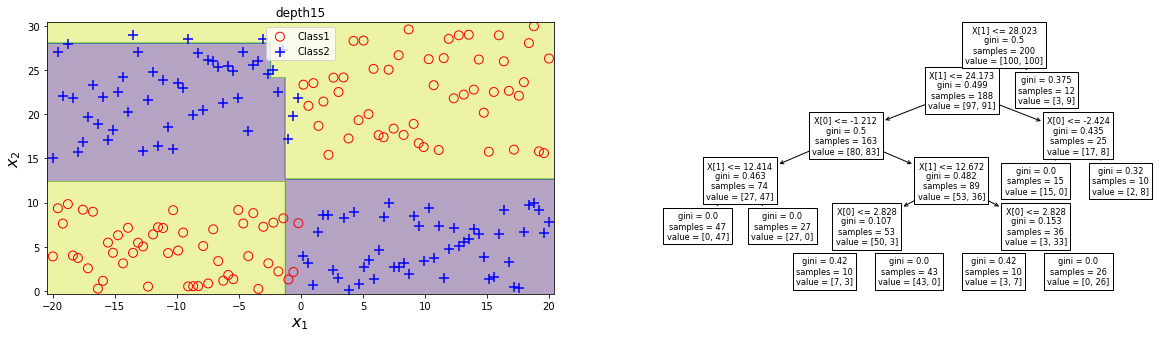

11 0.94


<ipython-input-32-b8d411288f06>:56: UserWarning: You passed a edgecolor/edgecolors ('b') for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(X1[y == 0], X2[y == 0],     facecolors='b',


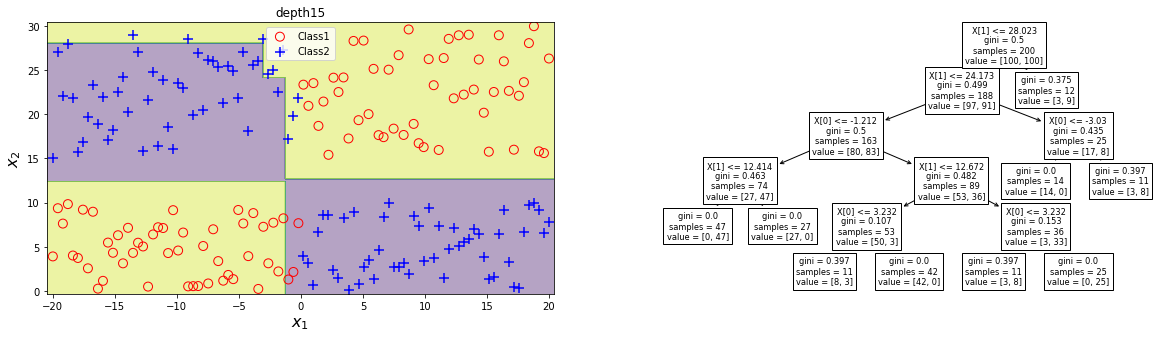

12 0.935


<ipython-input-32-b8d411288f06>:56: UserWarning: You passed a edgecolor/edgecolors ('b') for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(X1[y == 0], X2[y == 0],     facecolors='b',


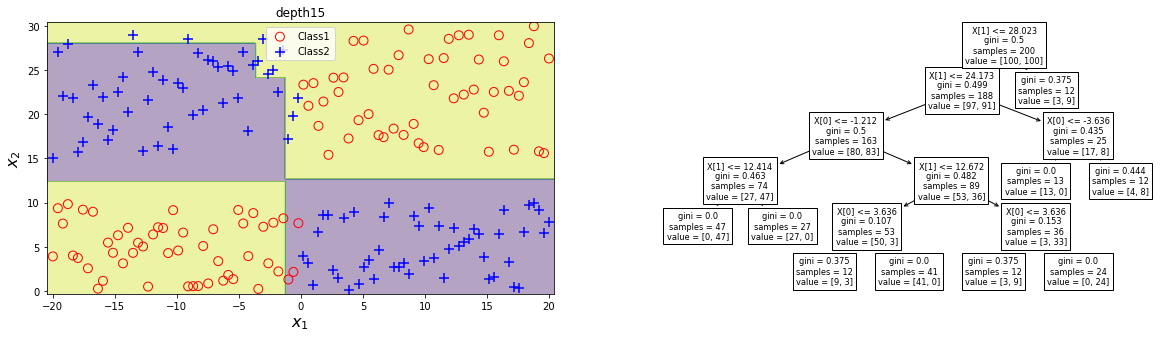

13 0.91


<ipython-input-32-b8d411288f06>:56: UserWarning: You passed a edgecolor/edgecolors ('b') for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(X1[y == 0], X2[y == 0],     facecolors='b',


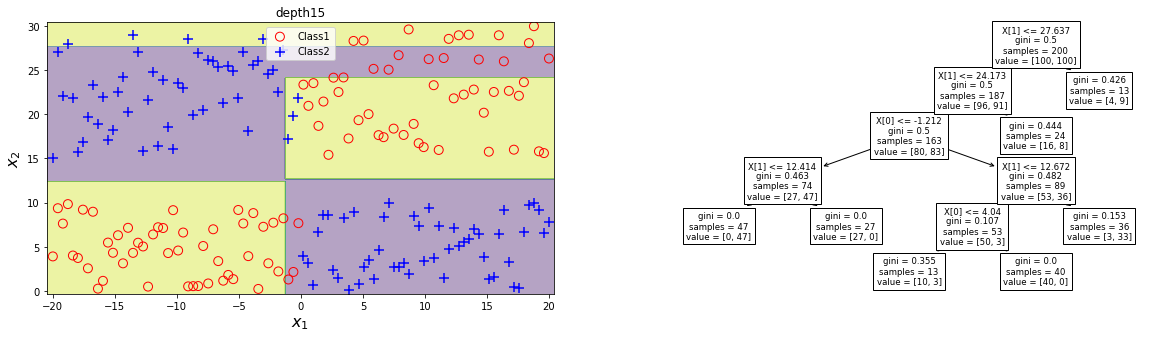

14 0.5


<ipython-input-32-b8d411288f06>:56: UserWarning: You passed a edgecolor/edgecolors ('b') for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(X1[y == 0], X2[y == 0],     facecolors='b',


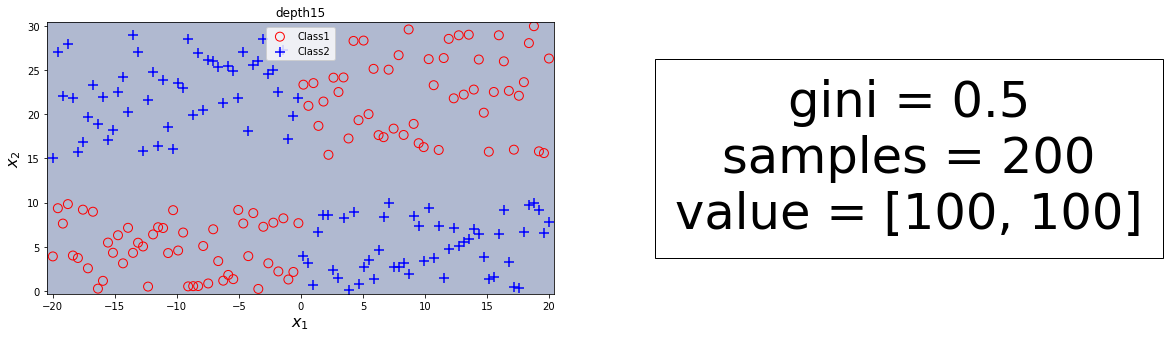

15 0.5


<ipython-input-32-b8d411288f06>:56: UserWarning: You passed a edgecolor/edgecolors ('b') for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(X1[y == 0], X2[y == 0],     facecolors='b',


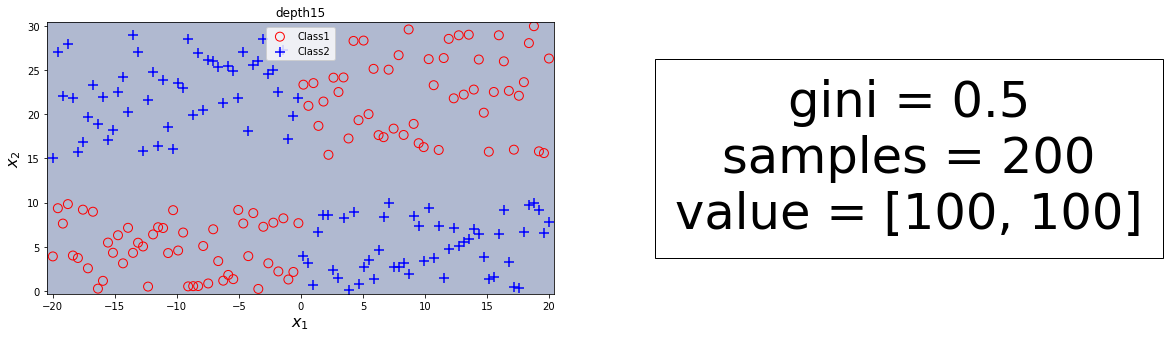

16 0.5


<ipython-input-32-b8d411288f06>:56: UserWarning: You passed a edgecolor/edgecolors ('b') for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(X1[y == 0], X2[y == 0],     facecolors='b',


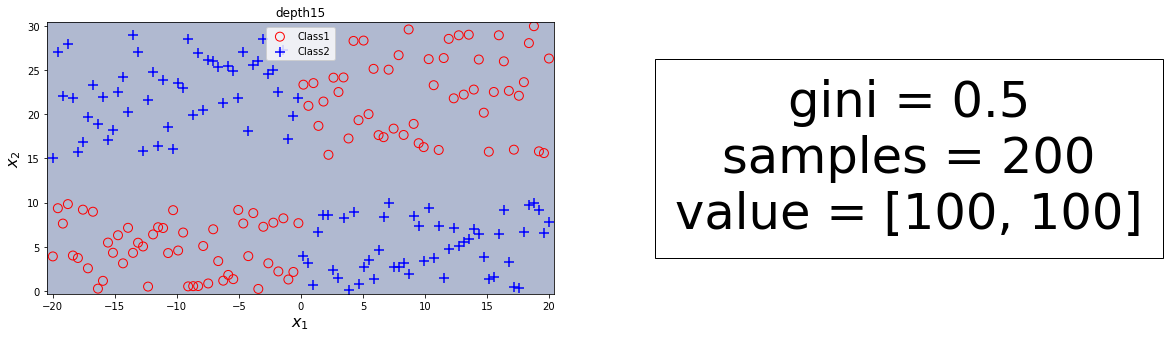

17 0.5


<ipython-input-32-b8d411288f06>:56: UserWarning: You passed a edgecolor/edgecolors ('b') for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(X1[y == 0], X2[y == 0],     facecolors='b',


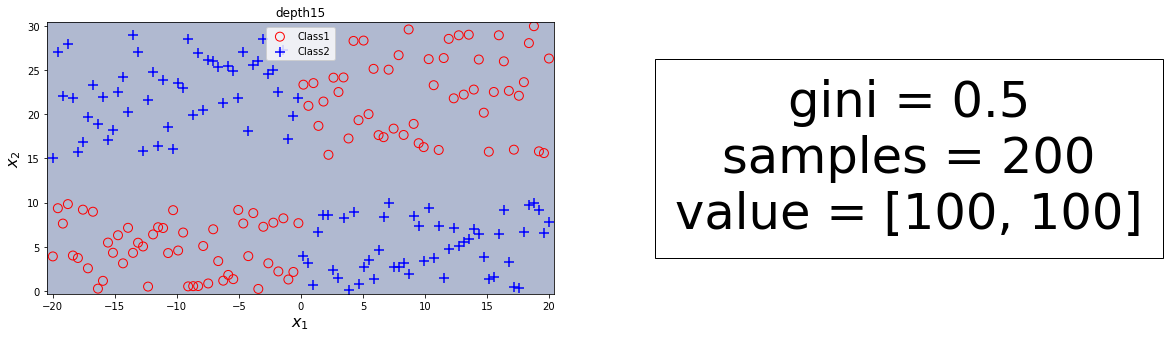

18 0.5


<ipython-input-32-b8d411288f06>:56: UserWarning: You passed a edgecolor/edgecolors ('b') for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(X1[y == 0], X2[y == 0],     facecolors='b',


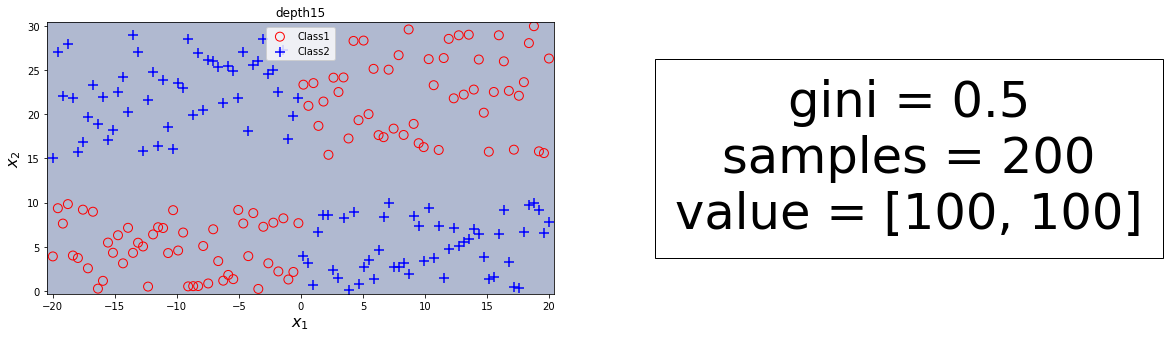

19 0.5


<ipython-input-32-b8d411288f06>:56: UserWarning: You passed a edgecolor/edgecolors ('b') for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(X1[y == 0], X2[y == 0],     facecolors='b',


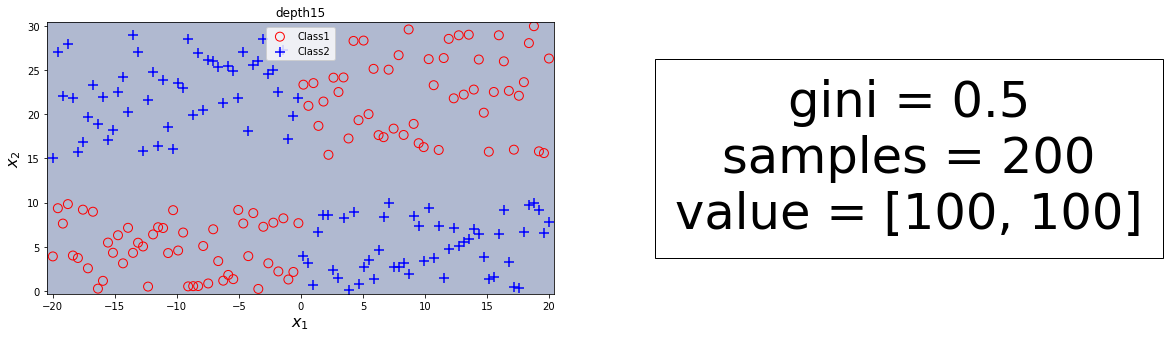

max_accuracy=0.995, max_depth=15, min_leaf=3, min_split=10, min_impurity=0.005


In [62]:
# to be able to change these and experiement easily
max_depths   = [15] 
min_leafs    = [i for i in range(1, 20)]                        
min_splits   = [10]                            
min_impurity = [0.005]
max_accuracy = 0
clf =[]
for d in max_depths:
    for f in min_leafs:
        for s in min_splits:
            for i in min_impurity:
                accuracy,clf = fit_plot_DT(max_depth=d, min_leaf=f, min_split=s, min_impurity= i)
                print(f, accuracy)
                fit_plot_DT(max_depth=d, min_leaf=f, min_split=s,min_impurity= i, plot=True)
                if accuracy >= max_accuracy: 
                    max_accuracy = accuracy
                    max_d    = d
                    min_f    = f
                    min_s    = s
                    min_i    = i
print('max_accuracy={}, max_depth={}, min_leaf={}, min_split={}, min_impurity={}'.format(
       max_accuracy,    max_d,        min_f,       min_s,        min_i))


### study the effect of min split

[2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70]
2 0.955


<ipython-input-10-b8d411288f06>:56: UserWarning: You passed a edgecolor/edgecolors ('b') for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(X1[y == 0], X2[y == 0],     facecolors='b',


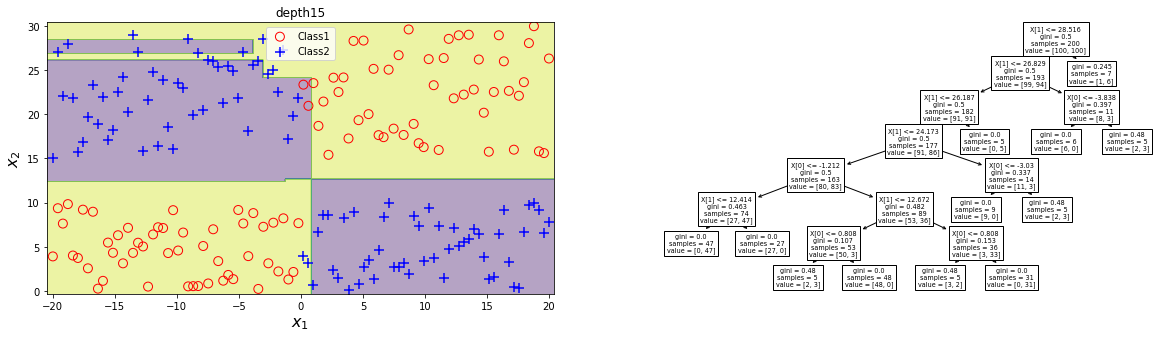

3 0.955


<ipython-input-10-b8d411288f06>:56: UserWarning: You passed a edgecolor/edgecolors ('b') for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(X1[y == 0], X2[y == 0],     facecolors='b',


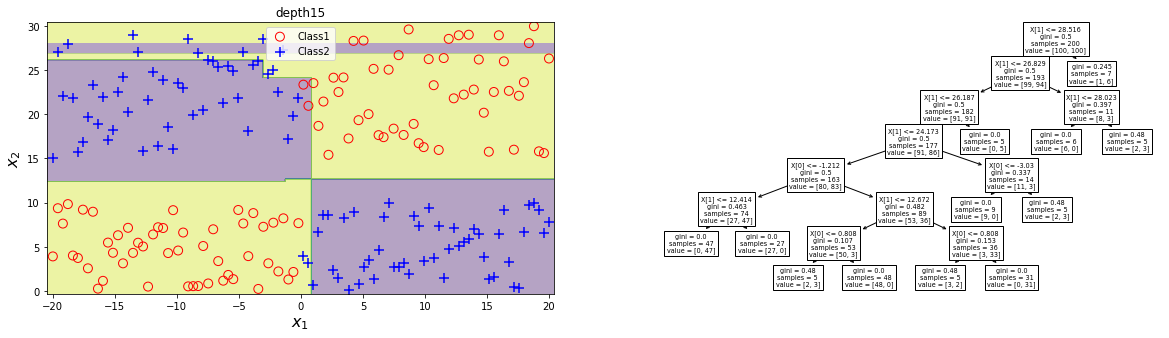

4 0.955


<ipython-input-10-b8d411288f06>:56: UserWarning: You passed a edgecolor/edgecolors ('b') for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(X1[y == 0], X2[y == 0],     facecolors='b',


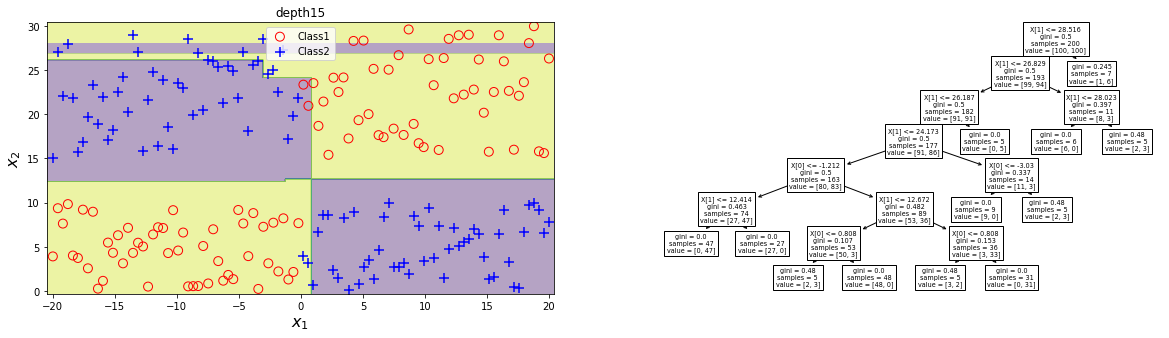

5 0.955


<ipython-input-10-b8d411288f06>:56: UserWarning: You passed a edgecolor/edgecolors ('b') for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(X1[y == 0], X2[y == 0],     facecolors='b',


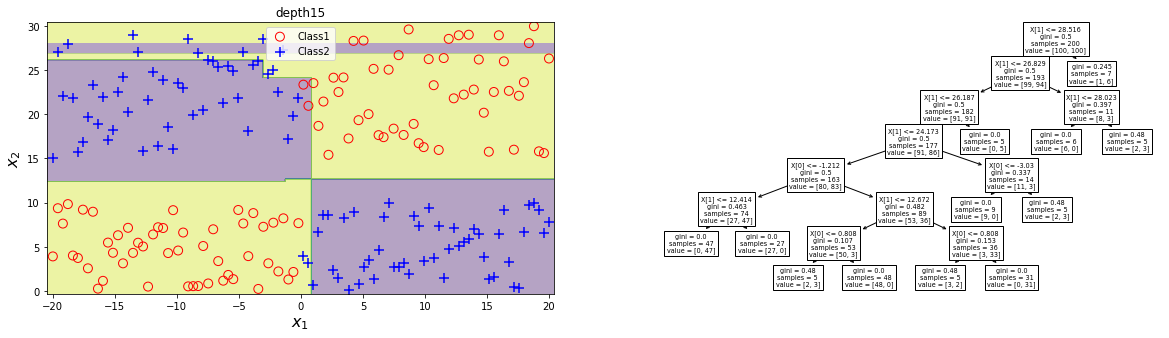

6 0.955


<ipython-input-10-b8d411288f06>:56: UserWarning: You passed a edgecolor/edgecolors ('b') for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(X1[y == 0], X2[y == 0],     facecolors='b',


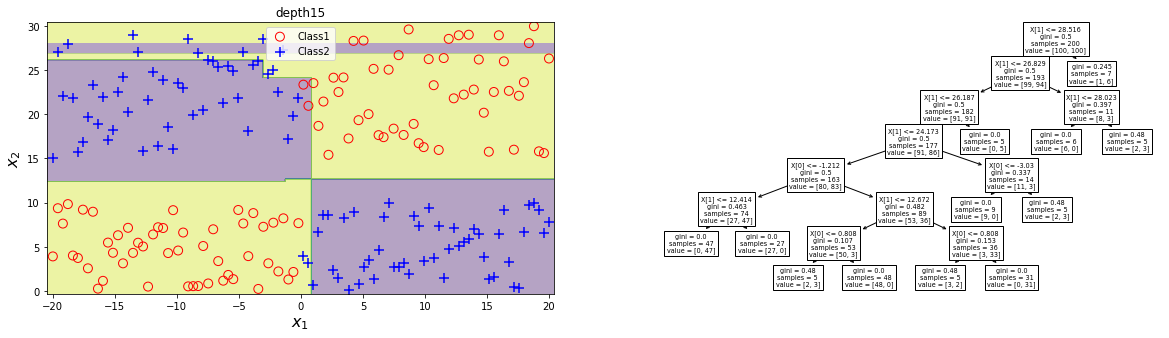

7 0.955


<ipython-input-10-b8d411288f06>:56: UserWarning: You passed a edgecolor/edgecolors ('b') for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(X1[y == 0], X2[y == 0],     facecolors='b',


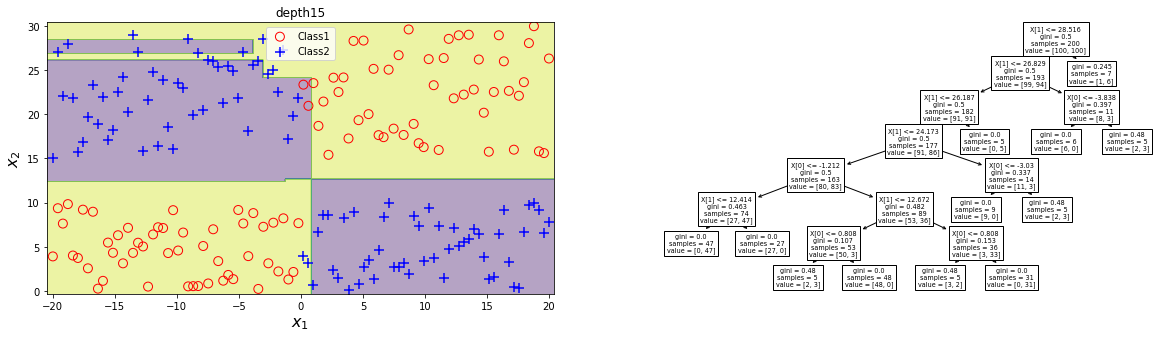

8 0.955


<ipython-input-10-b8d411288f06>:56: UserWarning: You passed a edgecolor/edgecolors ('b') for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(X1[y == 0], X2[y == 0],     facecolors='b',


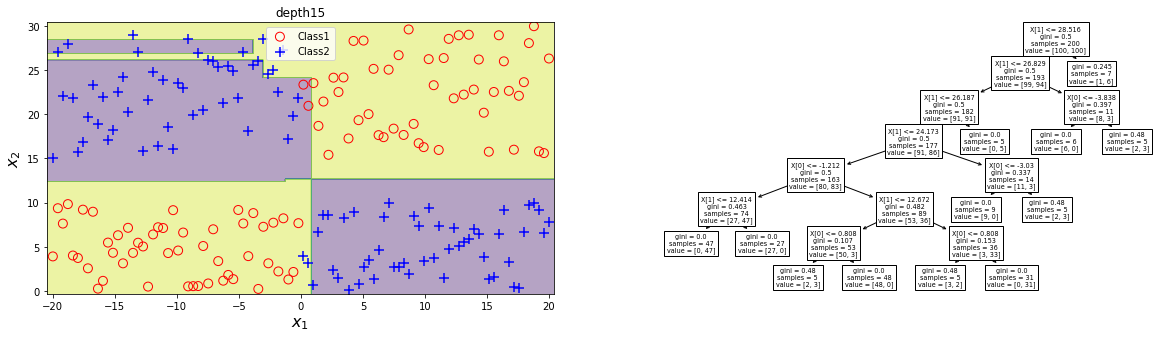

9 0.955


<ipython-input-10-b8d411288f06>:56: UserWarning: You passed a edgecolor/edgecolors ('b') for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(X1[y == 0], X2[y == 0],     facecolors='b',


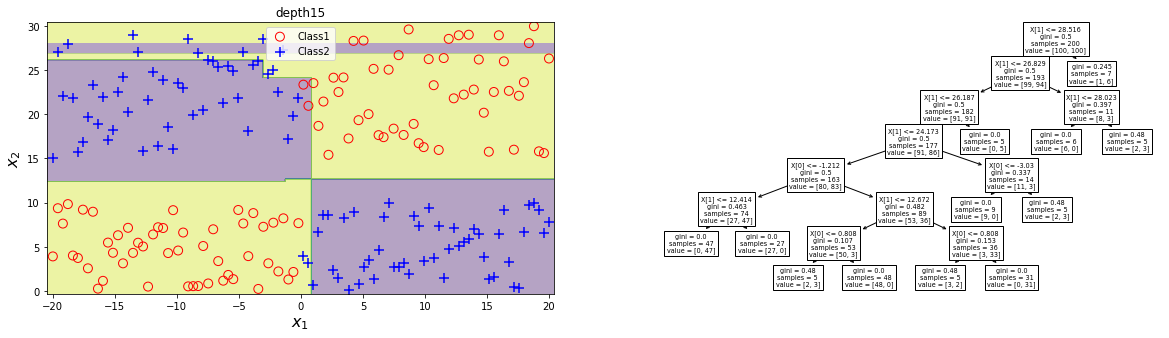

10 0.955


<ipython-input-10-b8d411288f06>:56: UserWarning: You passed a edgecolor/edgecolors ('b') for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(X1[y == 0], X2[y == 0],     facecolors='b',


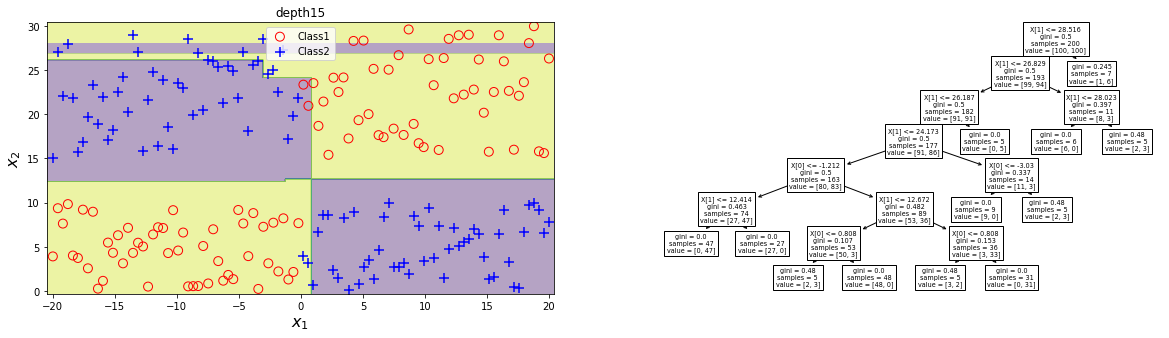

11 0.955


<ipython-input-10-b8d411288f06>:56: UserWarning: You passed a edgecolor/edgecolors ('b') for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(X1[y == 0], X2[y == 0],     facecolors='b',


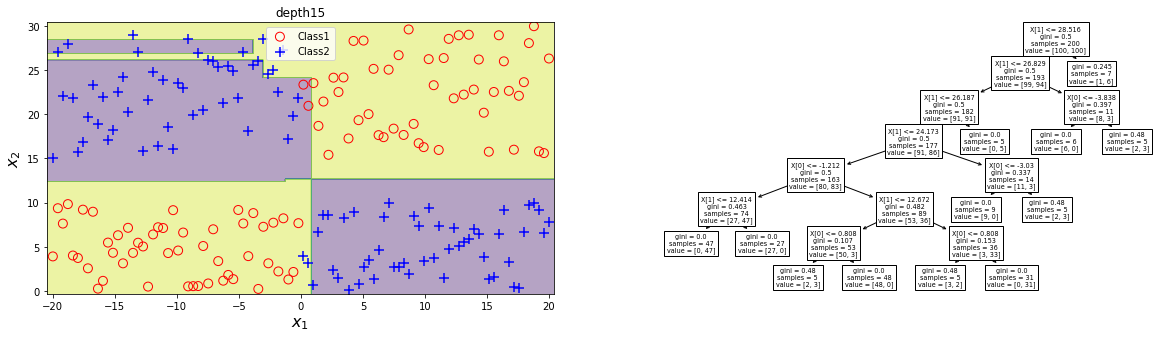

12 0.95


<ipython-input-10-b8d411288f06>:56: UserWarning: You passed a edgecolor/edgecolors ('b') for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(X1[y == 0], X2[y == 0],     facecolors='b',


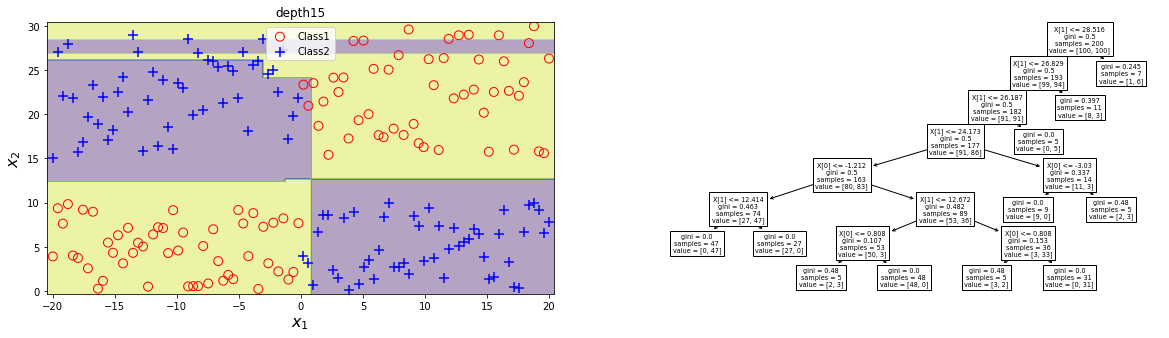

13 0.95


<ipython-input-10-b8d411288f06>:56: UserWarning: You passed a edgecolor/edgecolors ('b') for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(X1[y == 0], X2[y == 0],     facecolors='b',


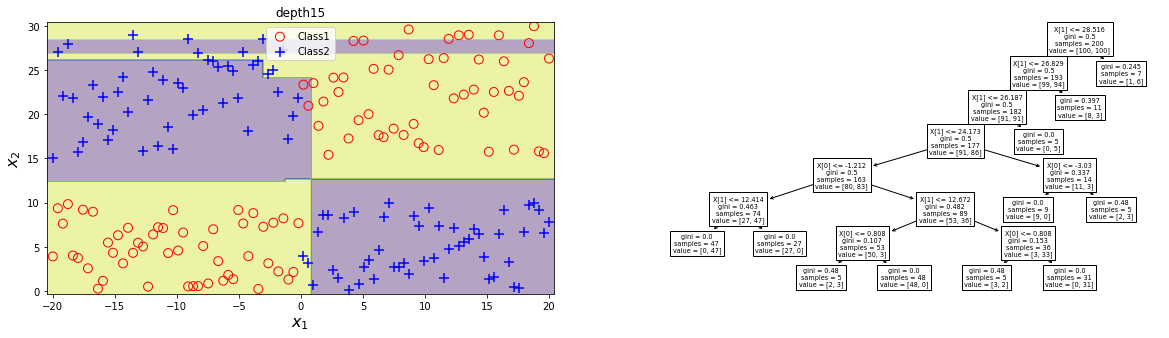

14 0.95


<ipython-input-10-b8d411288f06>:56: UserWarning: You passed a edgecolor/edgecolors ('b') for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(X1[y == 0], X2[y == 0],     facecolors='b',


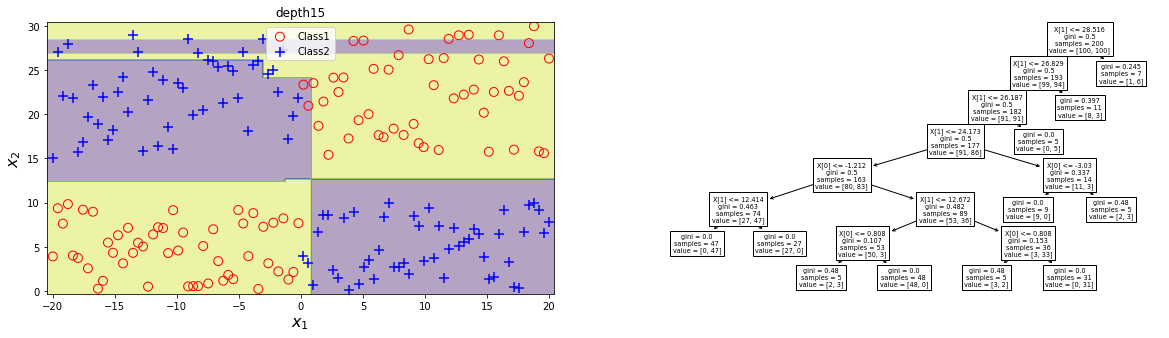

15 0.945


<ipython-input-10-b8d411288f06>:56: UserWarning: You passed a edgecolor/edgecolors ('b') for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(X1[y == 0], X2[y == 0],     facecolors='b',


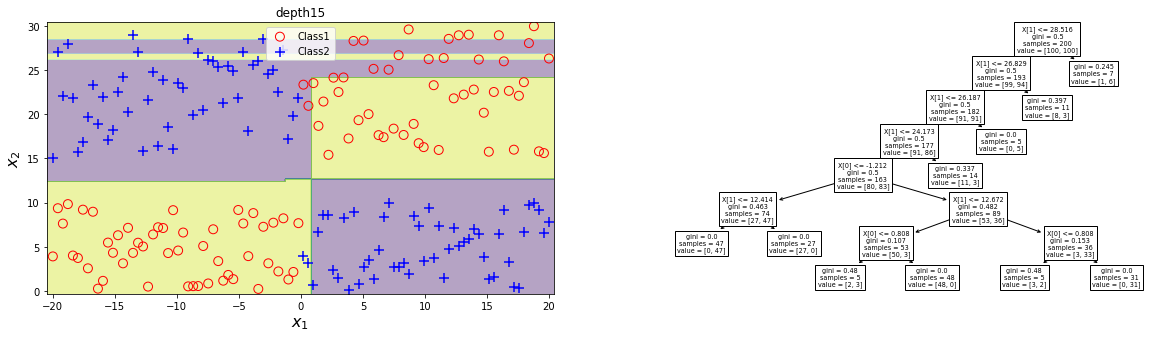

16 0.945


<ipython-input-10-b8d411288f06>:56: UserWarning: You passed a edgecolor/edgecolors ('b') for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(X1[y == 0], X2[y == 0],     facecolors='b',


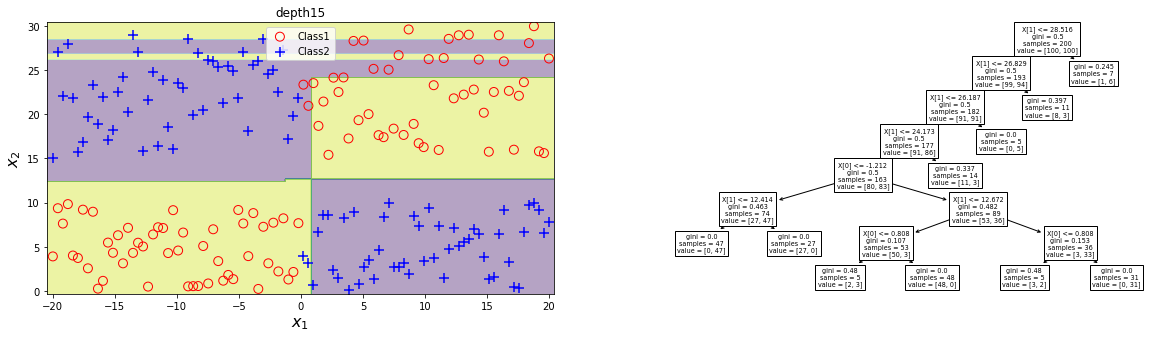

17 0.945


<ipython-input-10-b8d411288f06>:56: UserWarning: You passed a edgecolor/edgecolors ('b') for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(X1[y == 0], X2[y == 0],     facecolors='b',


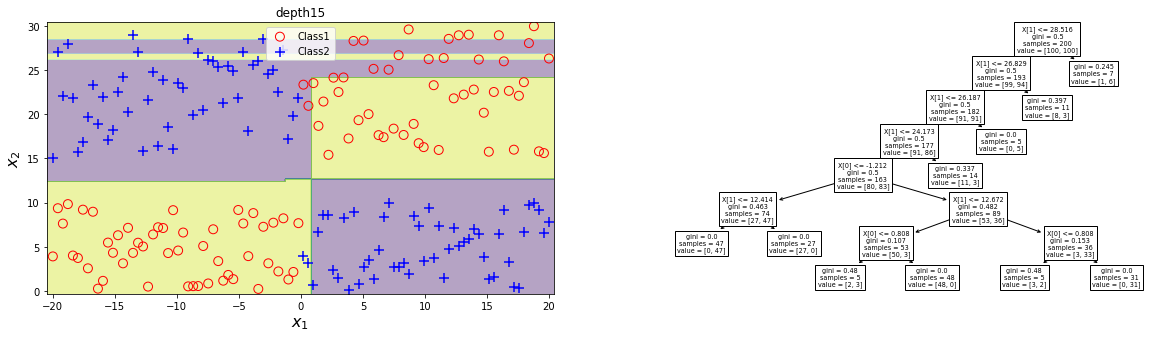

18 0.945


<ipython-input-10-b8d411288f06>:56: UserWarning: You passed a edgecolor/edgecolors ('b') for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(X1[y == 0], X2[y == 0],     facecolors='b',


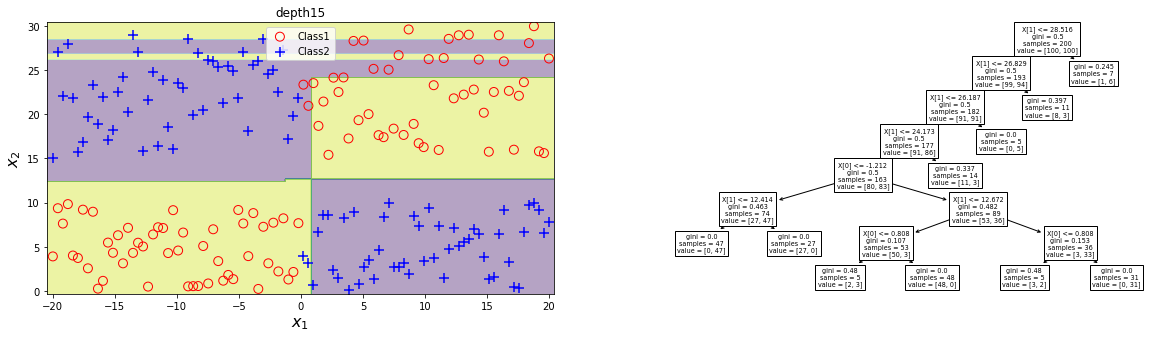

19 0.945


<ipython-input-10-b8d411288f06>:56: UserWarning: You passed a edgecolor/edgecolors ('b') for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(X1[y == 0], X2[y == 0],     facecolors='b',


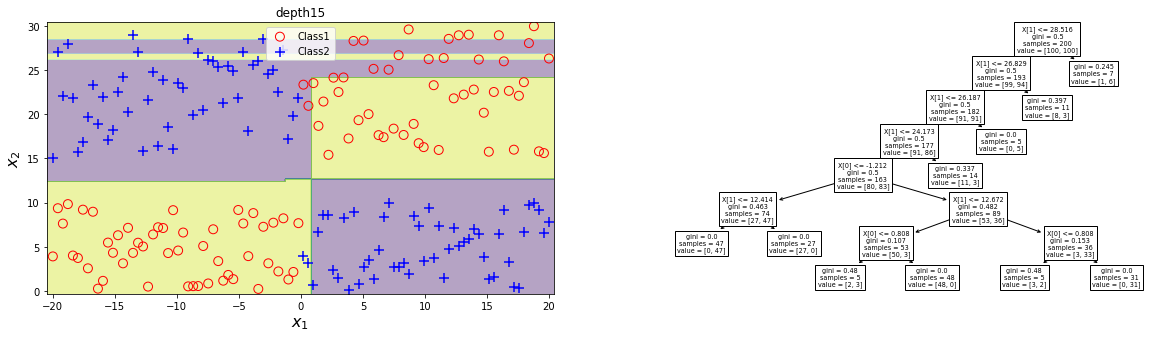

20 0.945


<ipython-input-10-b8d411288f06>:56: UserWarning: You passed a edgecolor/edgecolors ('b') for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(X1[y == 0], X2[y == 0],     facecolors='b',


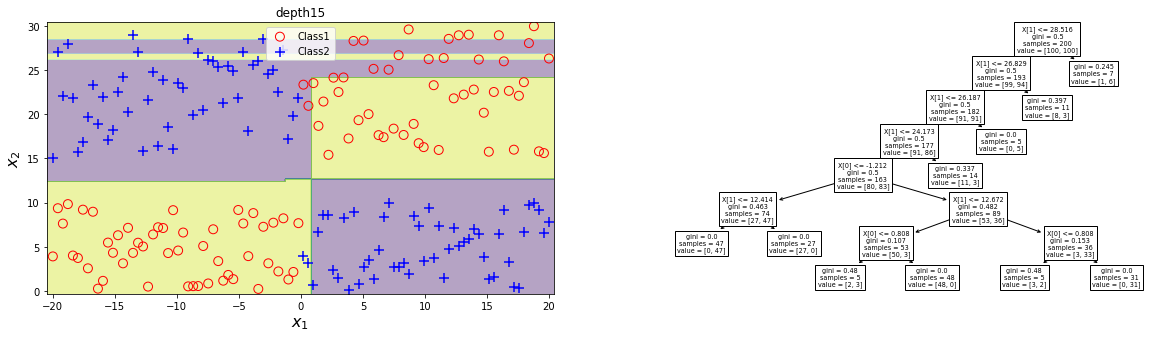

21 0.945


<ipython-input-10-b8d411288f06>:56: UserWarning: You passed a edgecolor/edgecolors ('b') for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(X1[y == 0], X2[y == 0],     facecolors='b',


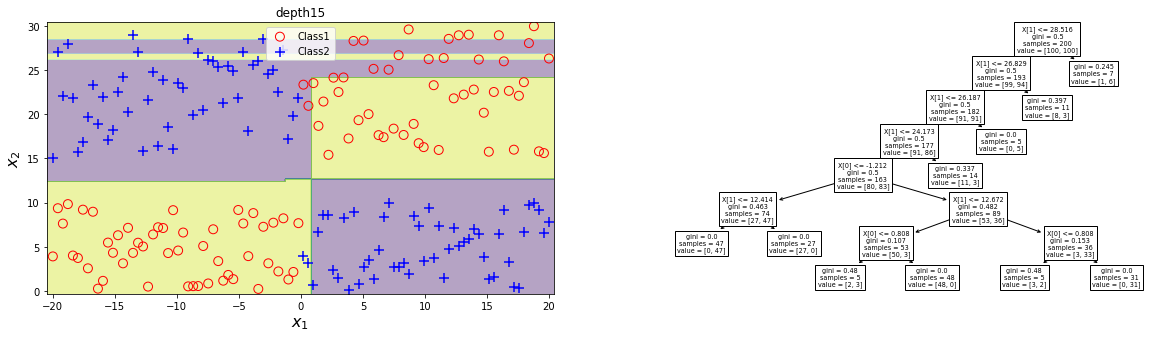

22 0.945


<ipython-input-10-b8d411288f06>:56: UserWarning: You passed a edgecolor/edgecolors ('b') for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(X1[y == 0], X2[y == 0],     facecolors='b',


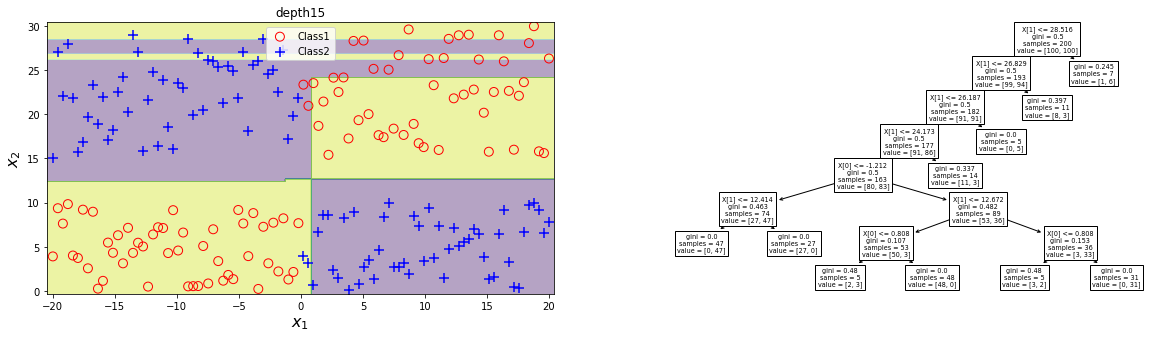

23 0.945


<ipython-input-10-b8d411288f06>:56: UserWarning: You passed a edgecolor/edgecolors ('b') for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(X1[y == 0], X2[y == 0],     facecolors='b',


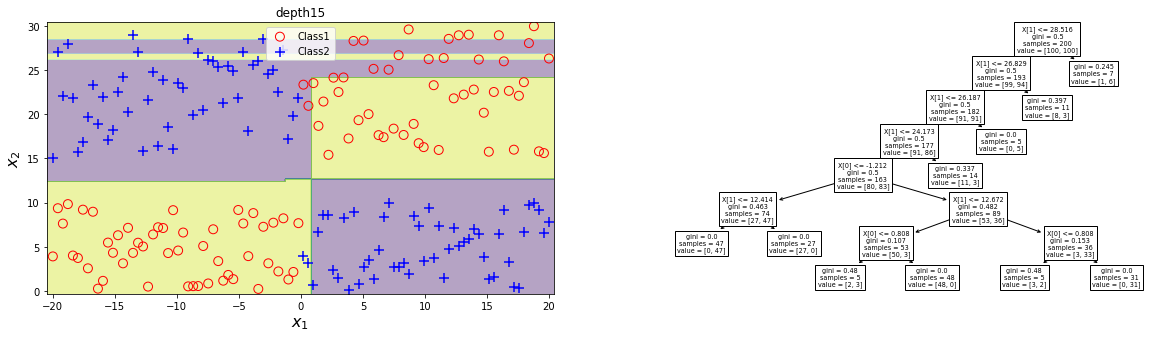

24 0.945


<ipython-input-10-b8d411288f06>:56: UserWarning: You passed a edgecolor/edgecolors ('b') for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(X1[y == 0], X2[y == 0],     facecolors='b',


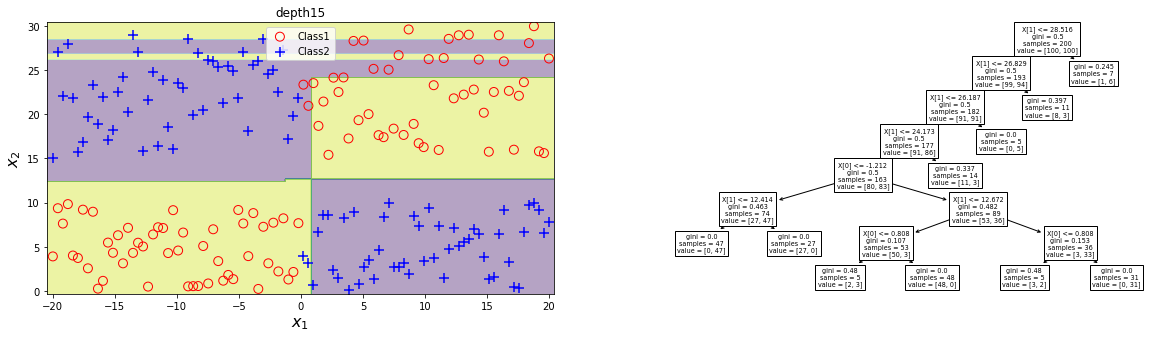

25 0.945


<ipython-input-10-b8d411288f06>:56: UserWarning: You passed a edgecolor/edgecolors ('b') for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(X1[y == 0], X2[y == 0],     facecolors='b',


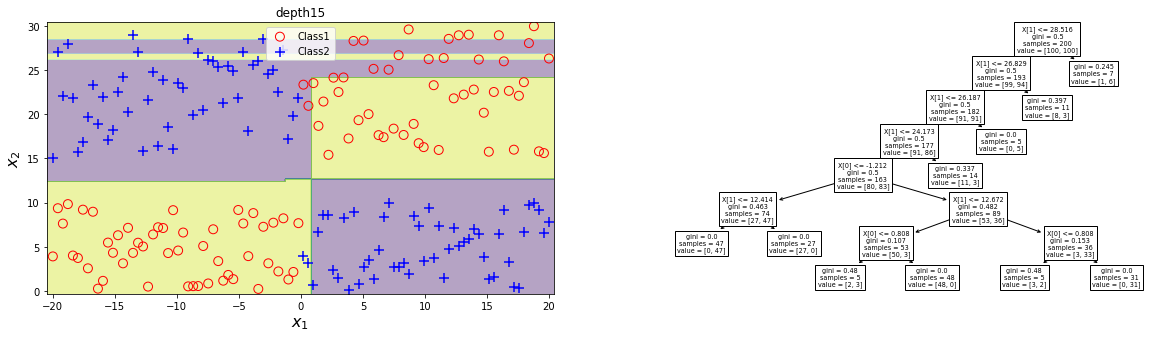

26 0.945


<ipython-input-10-b8d411288f06>:56: UserWarning: You passed a edgecolor/edgecolors ('b') for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(X1[y == 0], X2[y == 0],     facecolors='b',


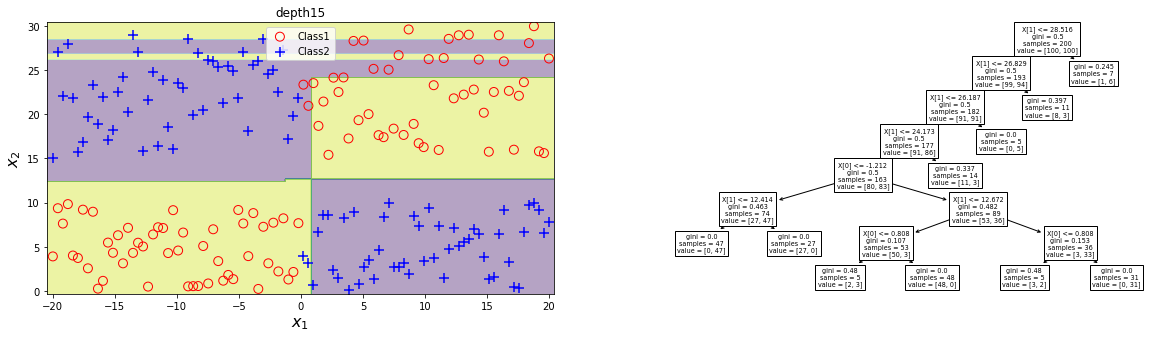

27 0.945


<ipython-input-10-b8d411288f06>:56: UserWarning: You passed a edgecolor/edgecolors ('b') for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(X1[y == 0], X2[y == 0],     facecolors='b',


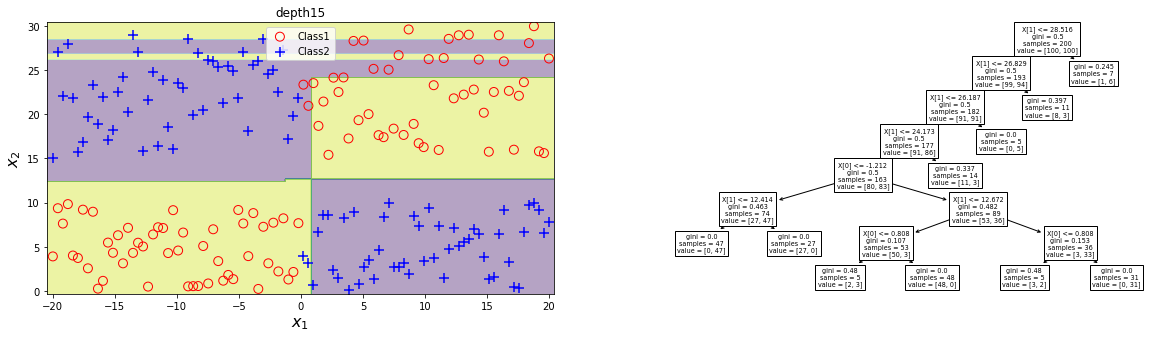

28 0.945


<ipython-input-10-b8d411288f06>:56: UserWarning: You passed a edgecolor/edgecolors ('b') for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(X1[y == 0], X2[y == 0],     facecolors='b',


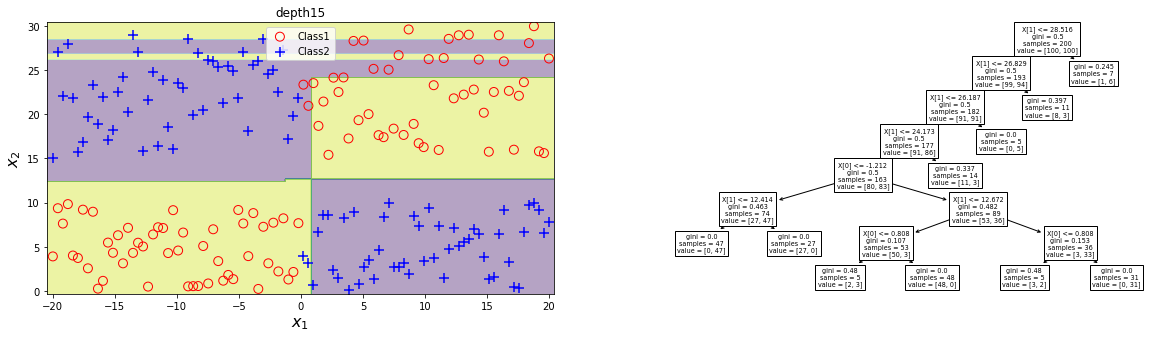

29 0.945


<ipython-input-10-b8d411288f06>:56: UserWarning: You passed a edgecolor/edgecolors ('b') for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(X1[y == 0], X2[y == 0],     facecolors='b',


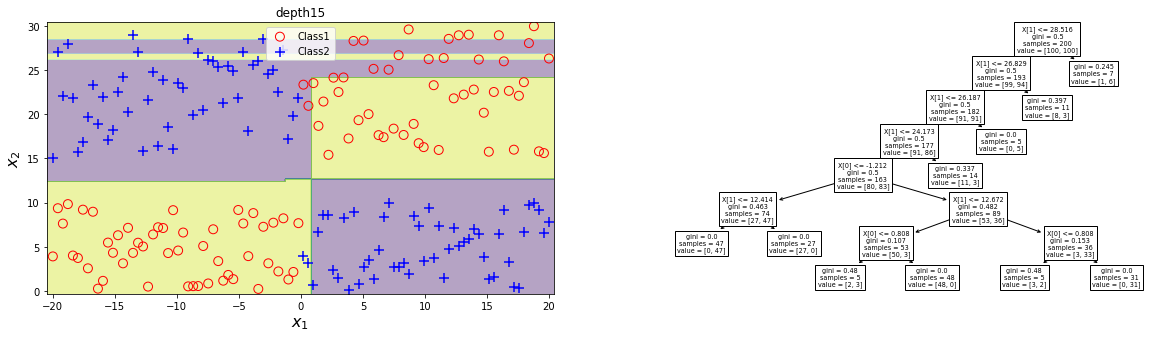

30 0.945


<ipython-input-10-b8d411288f06>:56: UserWarning: You passed a edgecolor/edgecolors ('b') for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(X1[y == 0], X2[y == 0],     facecolors='b',


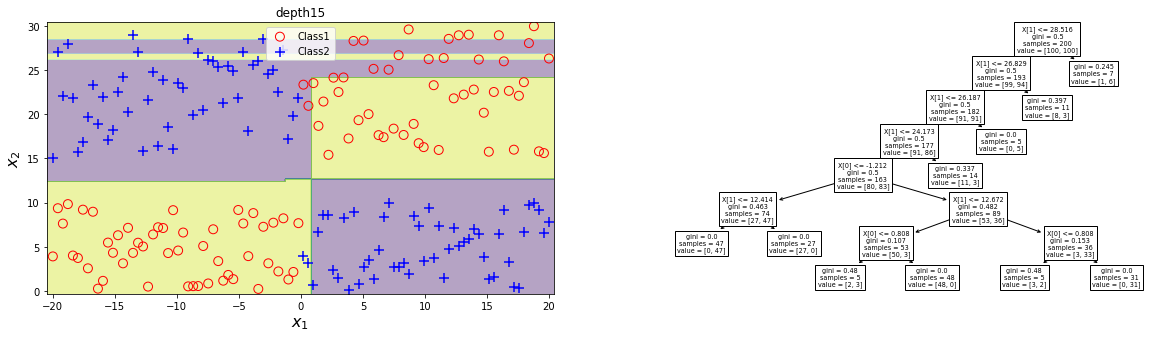

31 0.945


<ipython-input-10-b8d411288f06>:56: UserWarning: You passed a edgecolor/edgecolors ('b') for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(X1[y == 0], X2[y == 0],     facecolors='b',


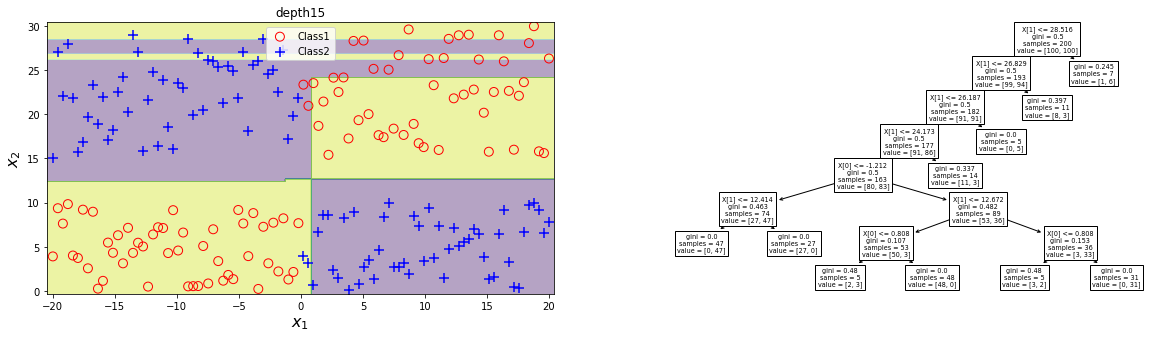

32 0.945


<ipython-input-10-b8d411288f06>:56: UserWarning: You passed a edgecolor/edgecolors ('b') for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(X1[y == 0], X2[y == 0],     facecolors='b',


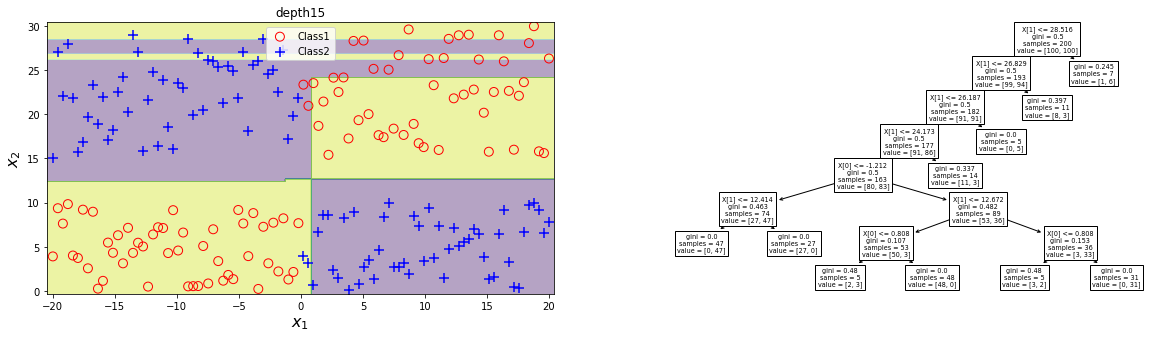

33 0.945


<ipython-input-10-b8d411288f06>:56: UserWarning: You passed a edgecolor/edgecolors ('b') for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(X1[y == 0], X2[y == 0],     facecolors='b',


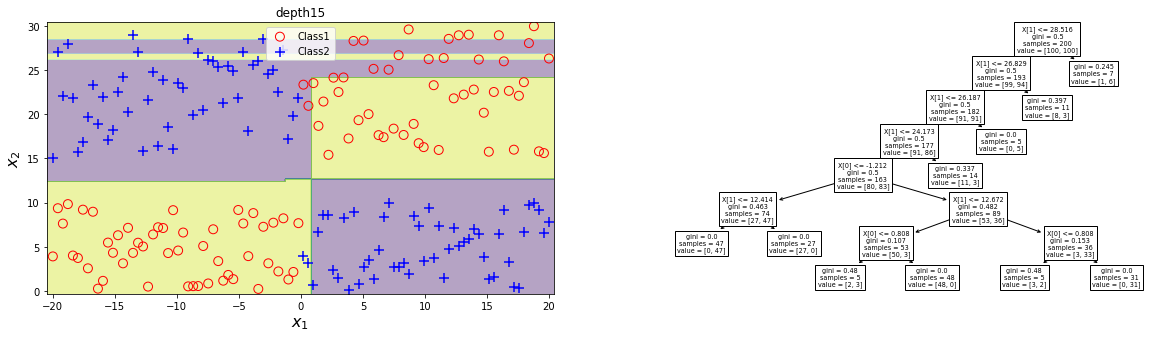

34 0.945


<ipython-input-10-b8d411288f06>:56: UserWarning: You passed a edgecolor/edgecolors ('b') for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(X1[y == 0], X2[y == 0],     facecolors='b',


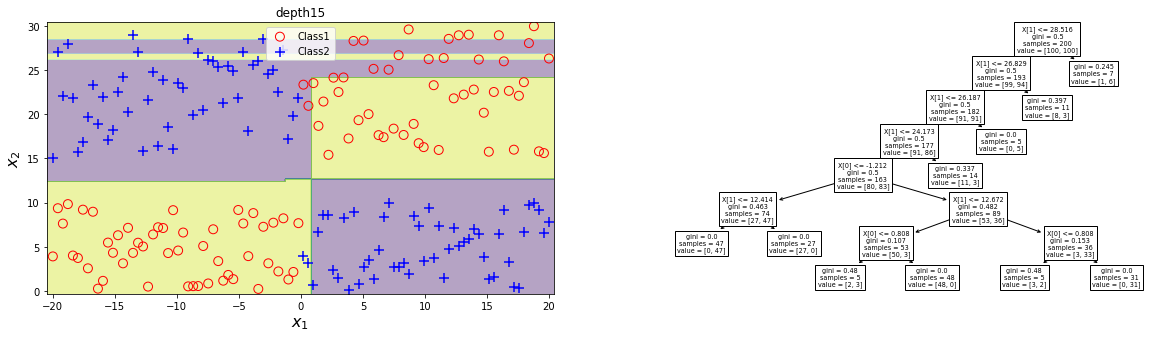

35 0.945


<ipython-input-10-b8d411288f06>:56: UserWarning: You passed a edgecolor/edgecolors ('b') for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(X1[y == 0], X2[y == 0],     facecolors='b',


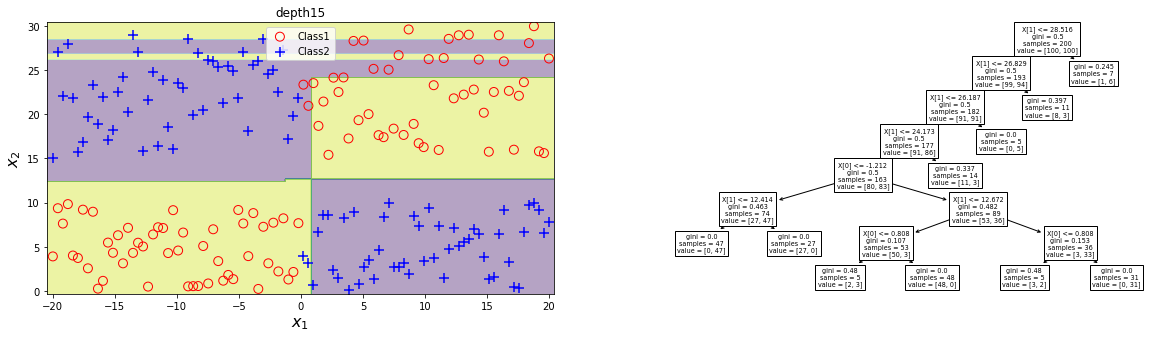

36 0.945


<ipython-input-10-b8d411288f06>:56: UserWarning: You passed a edgecolor/edgecolors ('b') for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(X1[y == 0], X2[y == 0],     facecolors='b',


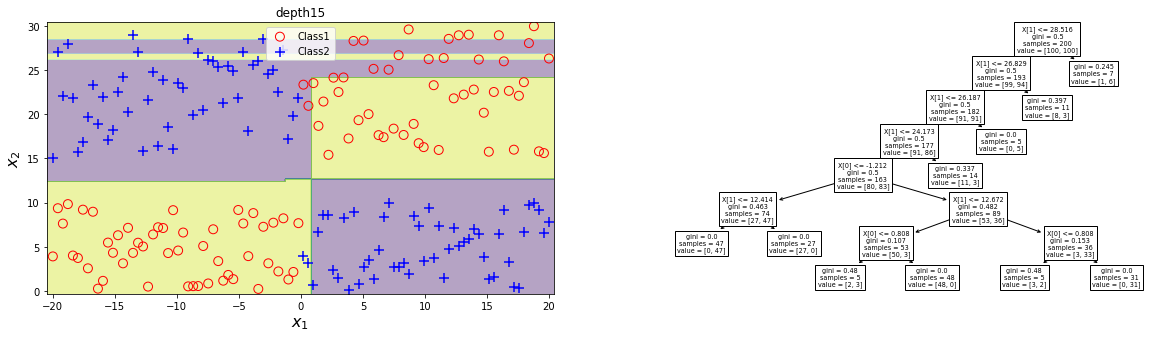

37 0.94


<ipython-input-10-b8d411288f06>:56: UserWarning: You passed a edgecolor/edgecolors ('b') for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(X1[y == 0], X2[y == 0],     facecolors='b',


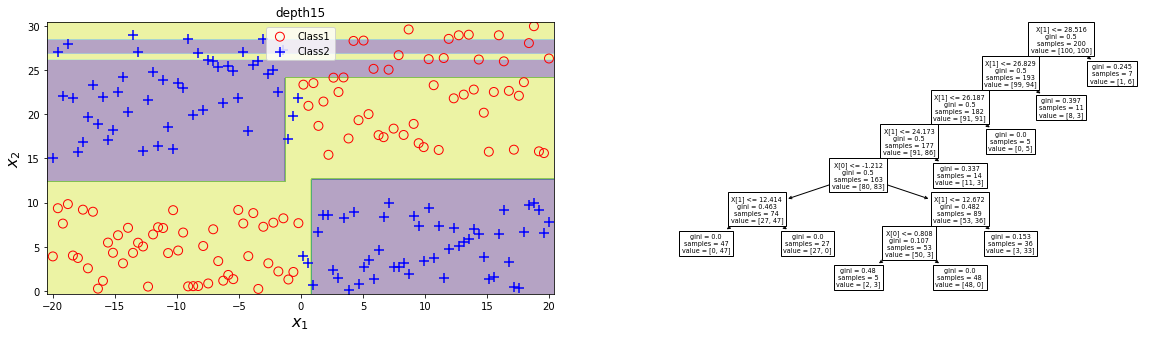

38 0.94


<ipython-input-10-b8d411288f06>:56: UserWarning: You passed a edgecolor/edgecolors ('b') for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(X1[y == 0], X2[y == 0],     facecolors='b',


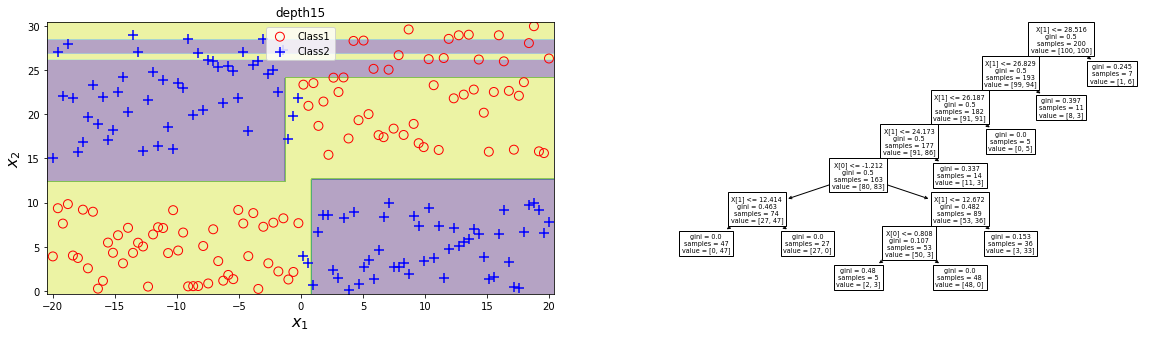

39 0.94


<ipython-input-10-b8d411288f06>:56: UserWarning: You passed a edgecolor/edgecolors ('b') for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(X1[y == 0], X2[y == 0],     facecolors='b',


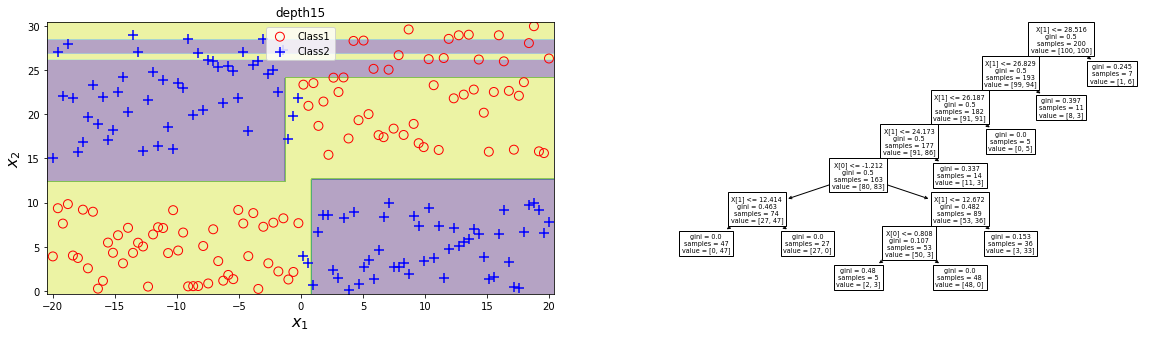

40 0.94


<ipython-input-10-b8d411288f06>:56: UserWarning: You passed a edgecolor/edgecolors ('b') for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(X1[y == 0], X2[y == 0],     facecolors='b',


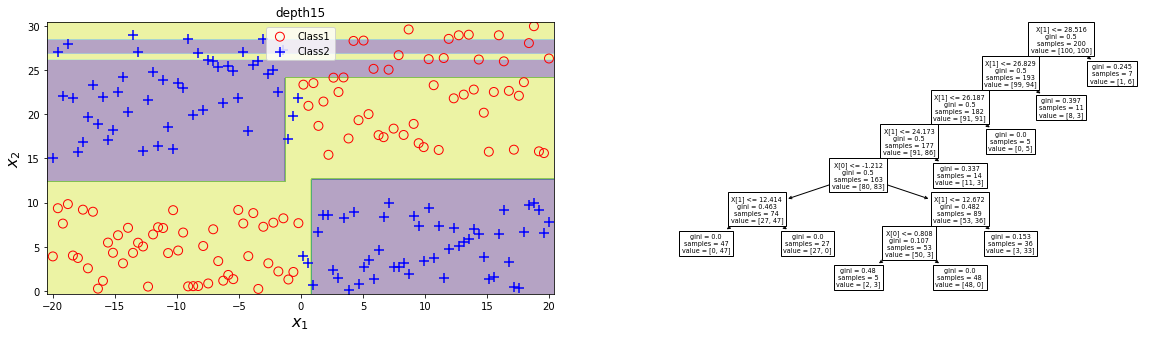

41 0.94


<ipython-input-10-b8d411288f06>:56: UserWarning: You passed a edgecolor/edgecolors ('b') for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(X1[y == 0], X2[y == 0],     facecolors='b',


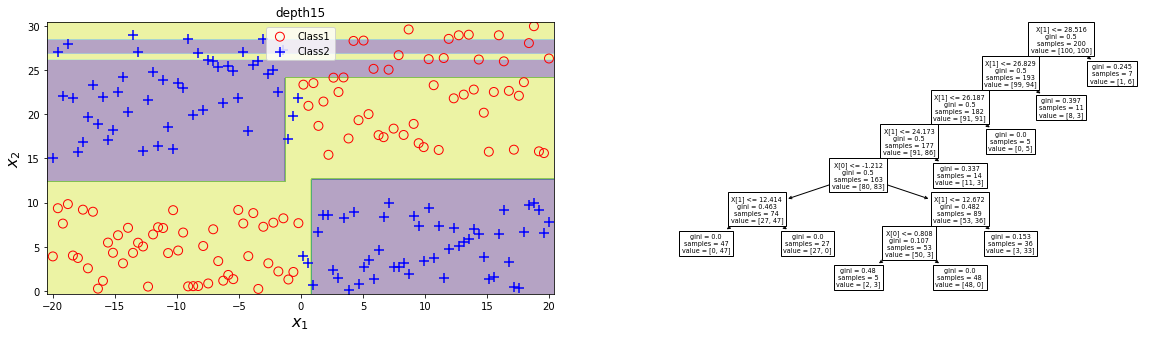

42 0.94


<ipython-input-10-b8d411288f06>:56: UserWarning: You passed a edgecolor/edgecolors ('b') for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(X1[y == 0], X2[y == 0],     facecolors='b',


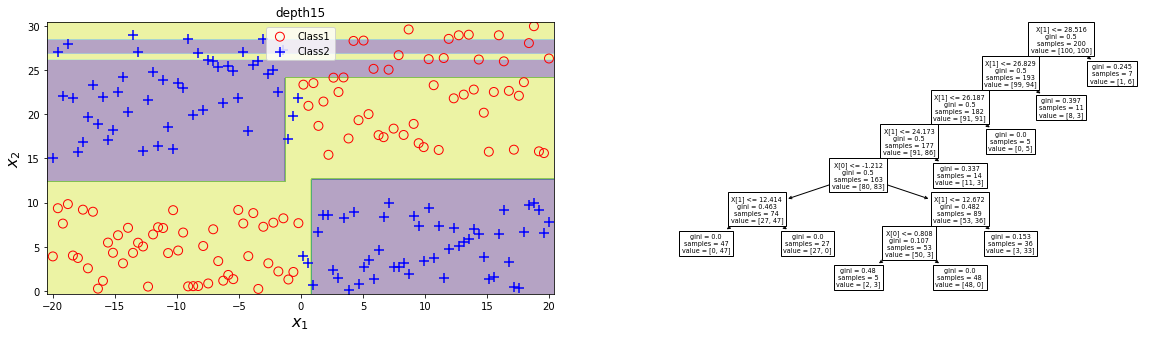

43 0.94


<ipython-input-10-b8d411288f06>:56: UserWarning: You passed a edgecolor/edgecolors ('b') for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(X1[y == 0], X2[y == 0],     facecolors='b',


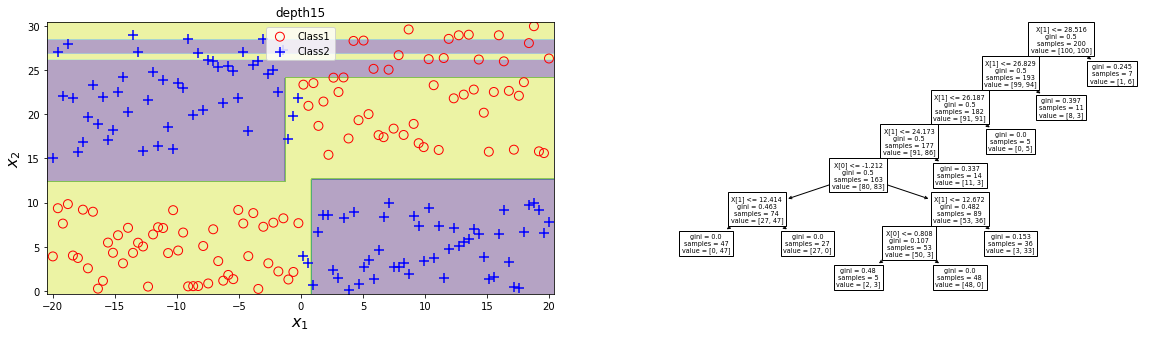

44 0.94


<ipython-input-10-b8d411288f06>:56: UserWarning: You passed a edgecolor/edgecolors ('b') for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(X1[y == 0], X2[y == 0],     facecolors='b',


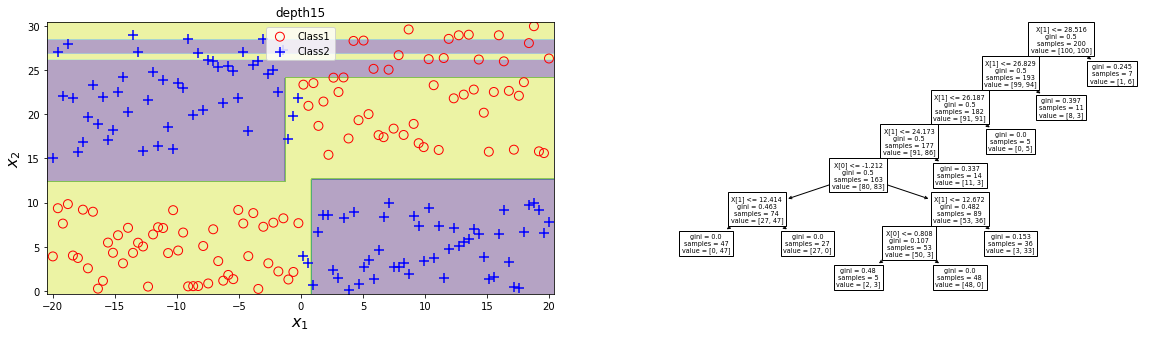

45 0.94


<ipython-input-10-b8d411288f06>:56: UserWarning: You passed a edgecolor/edgecolors ('b') for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(X1[y == 0], X2[y == 0],     facecolors='b',


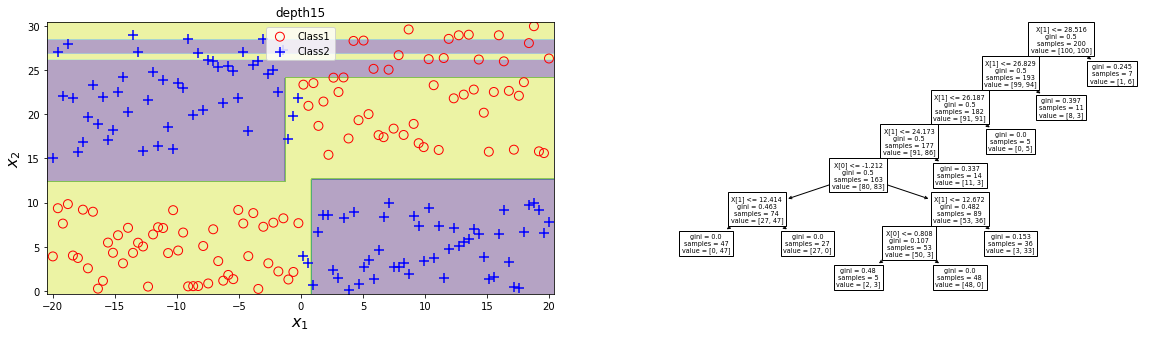

46 0.94


<ipython-input-10-b8d411288f06>:56: UserWarning: You passed a edgecolor/edgecolors ('b') for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(X1[y == 0], X2[y == 0],     facecolors='b',


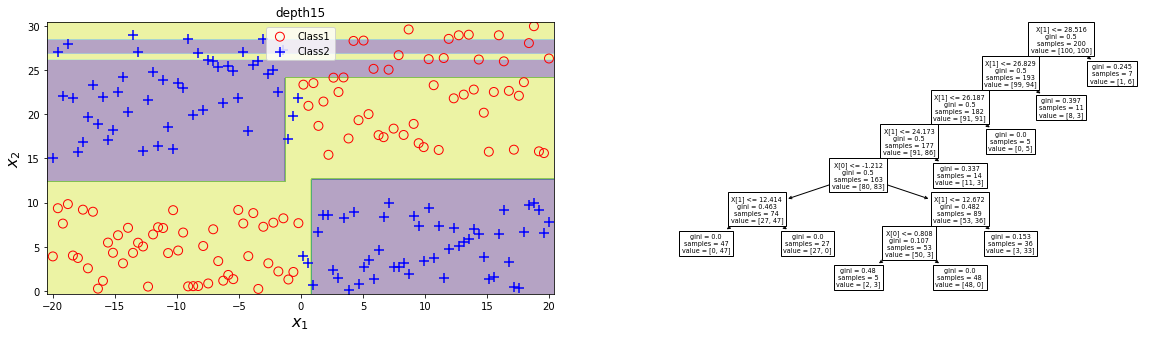

47 0.94


<ipython-input-10-b8d411288f06>:56: UserWarning: You passed a edgecolor/edgecolors ('b') for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(X1[y == 0], X2[y == 0],     facecolors='b',


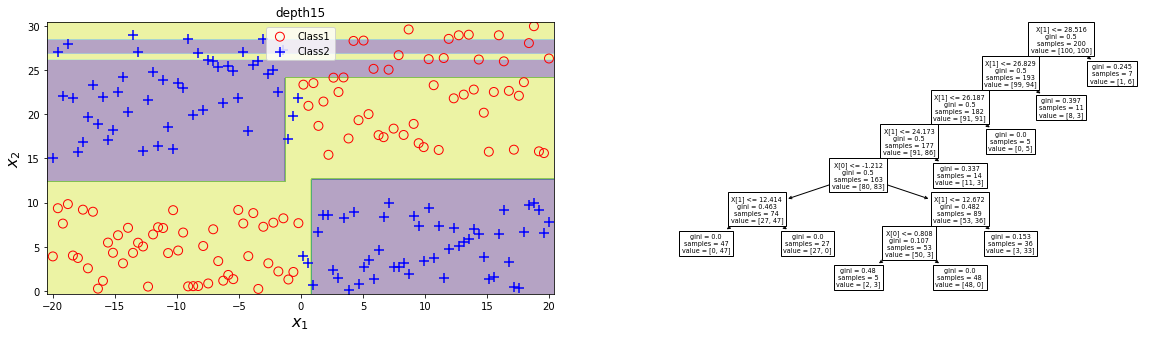

48 0.94


<ipython-input-10-b8d411288f06>:56: UserWarning: You passed a edgecolor/edgecolors ('b') for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(X1[y == 0], X2[y == 0],     facecolors='b',


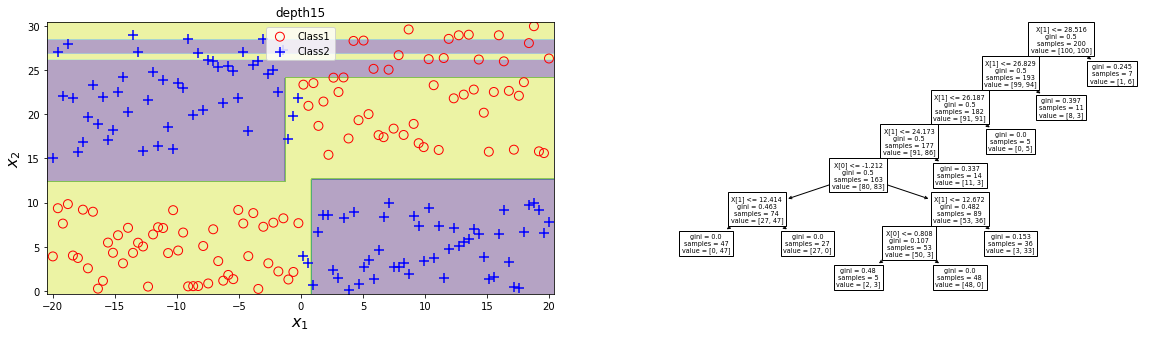

49 0.94


<ipython-input-10-b8d411288f06>:56: UserWarning: You passed a edgecolor/edgecolors ('b') for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(X1[y == 0], X2[y == 0],     facecolors='b',


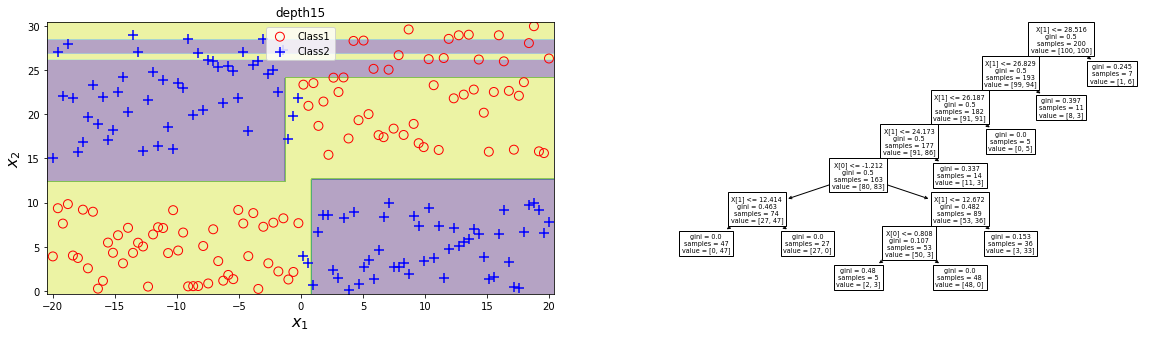

50 0.94


<ipython-input-10-b8d411288f06>:56: UserWarning: You passed a edgecolor/edgecolors ('b') for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(X1[y == 0], X2[y == 0],     facecolors='b',


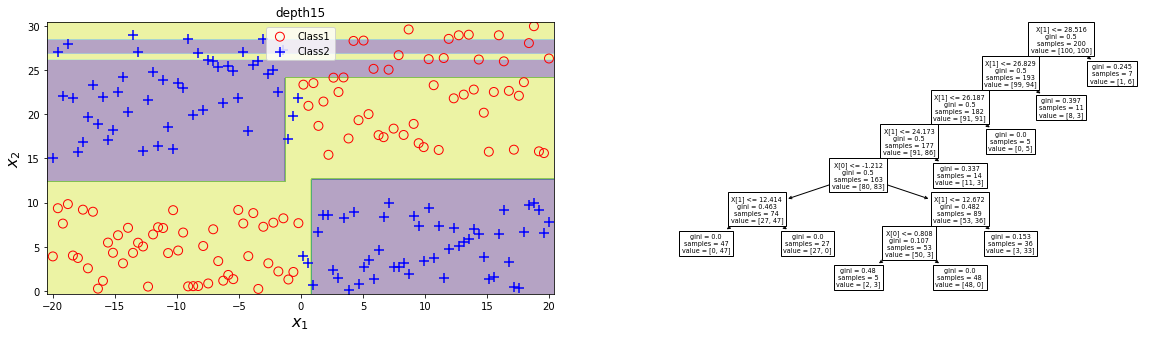

51 0.94


<ipython-input-10-b8d411288f06>:56: UserWarning: You passed a edgecolor/edgecolors ('b') for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(X1[y == 0], X2[y == 0],     facecolors='b',


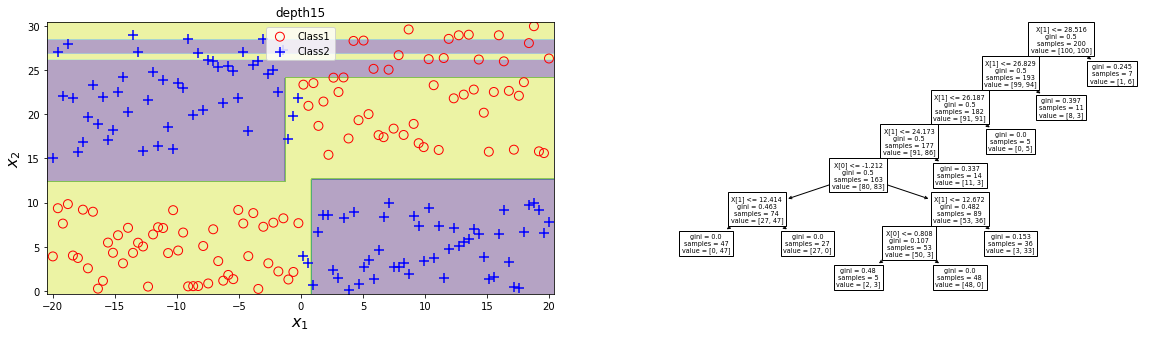

52 0.94


<ipython-input-10-b8d411288f06>:56: UserWarning: You passed a edgecolor/edgecolors ('b') for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(X1[y == 0], X2[y == 0],     facecolors='b',


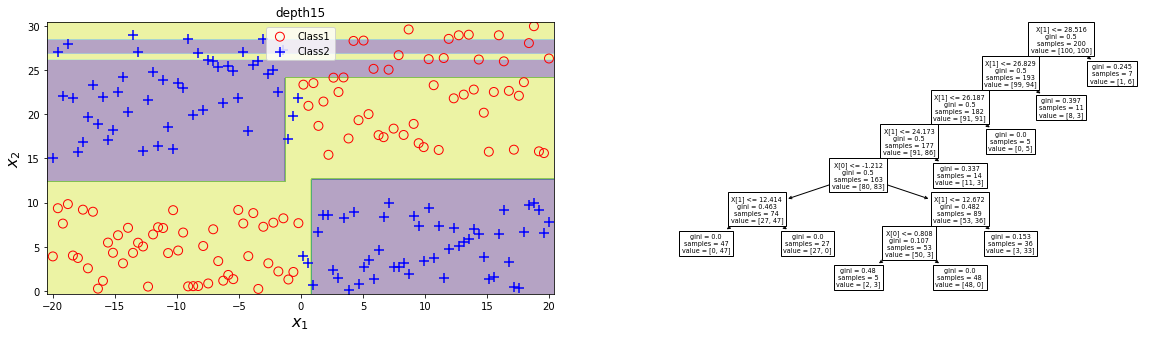

53 0.94


<ipython-input-10-b8d411288f06>:56: UserWarning: You passed a edgecolor/edgecolors ('b') for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(X1[y == 0], X2[y == 0],     facecolors='b',


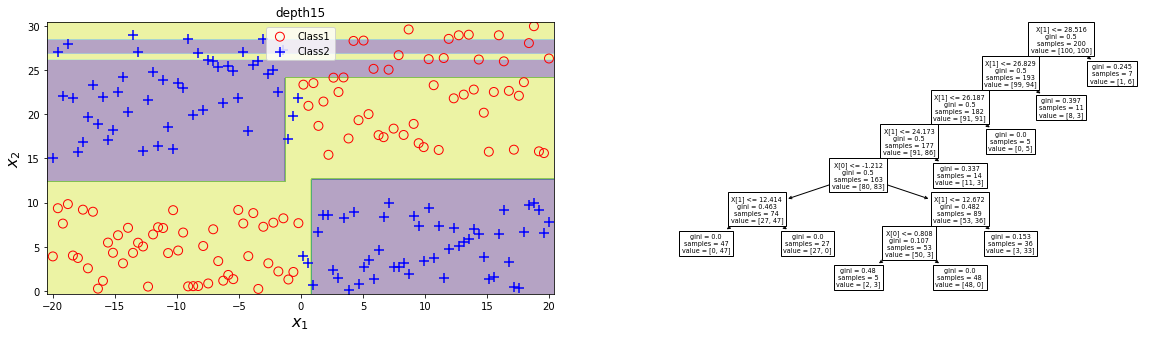

54 0.935


<ipython-input-10-b8d411288f06>:56: UserWarning: You passed a edgecolor/edgecolors ('b') for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(X1[y == 0], X2[y == 0],     facecolors='b',


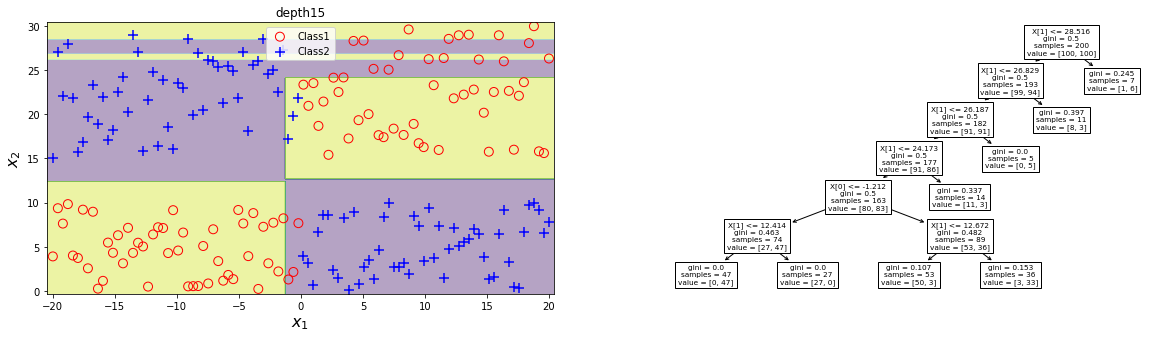

55 0.935


<ipython-input-10-b8d411288f06>:56: UserWarning: You passed a edgecolor/edgecolors ('b') for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(X1[y == 0], X2[y == 0],     facecolors='b',


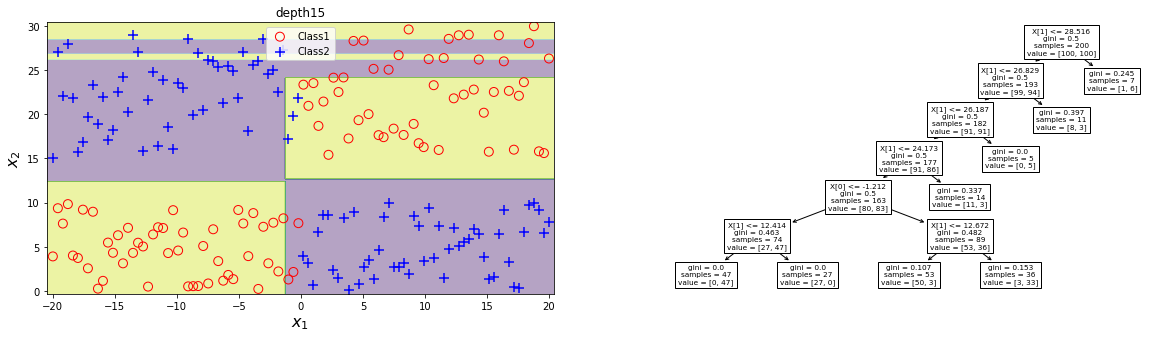

56 0.935


<ipython-input-10-b8d411288f06>:56: UserWarning: You passed a edgecolor/edgecolors ('b') for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(X1[y == 0], X2[y == 0],     facecolors='b',


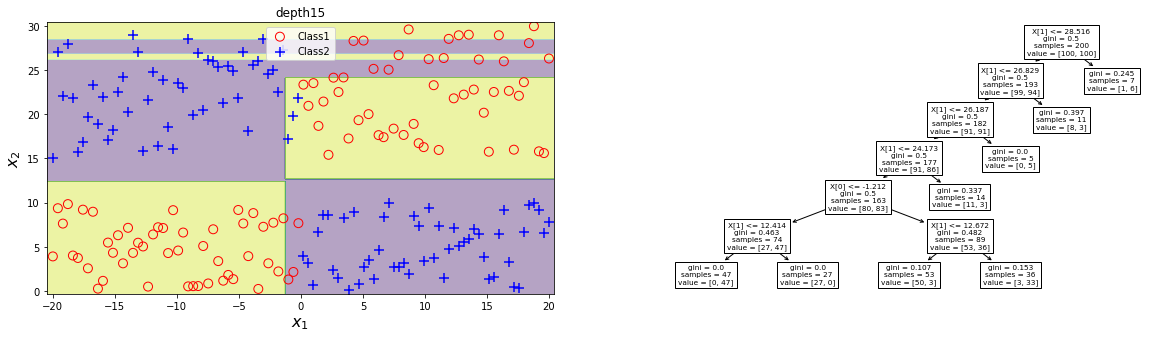

57 0.935


<ipython-input-10-b8d411288f06>:56: UserWarning: You passed a edgecolor/edgecolors ('b') for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(X1[y == 0], X2[y == 0],     facecolors='b',


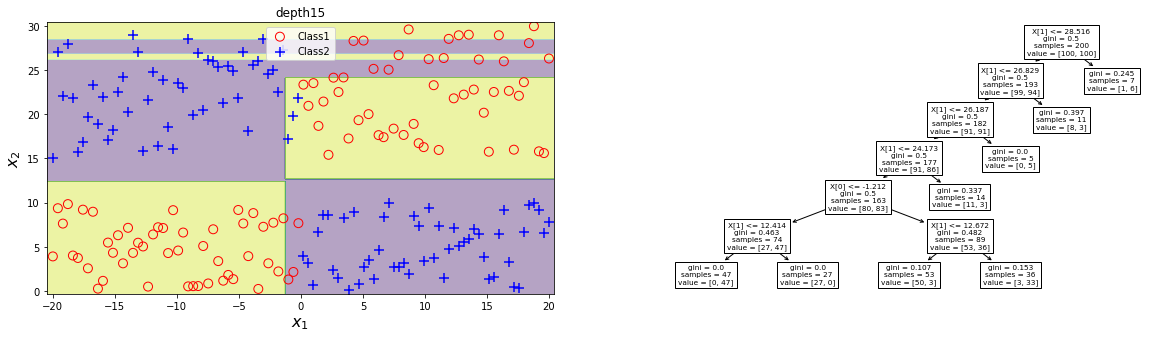

58 0.935


<ipython-input-10-b8d411288f06>:56: UserWarning: You passed a edgecolor/edgecolors ('b') for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(X1[y == 0], X2[y == 0],     facecolors='b',


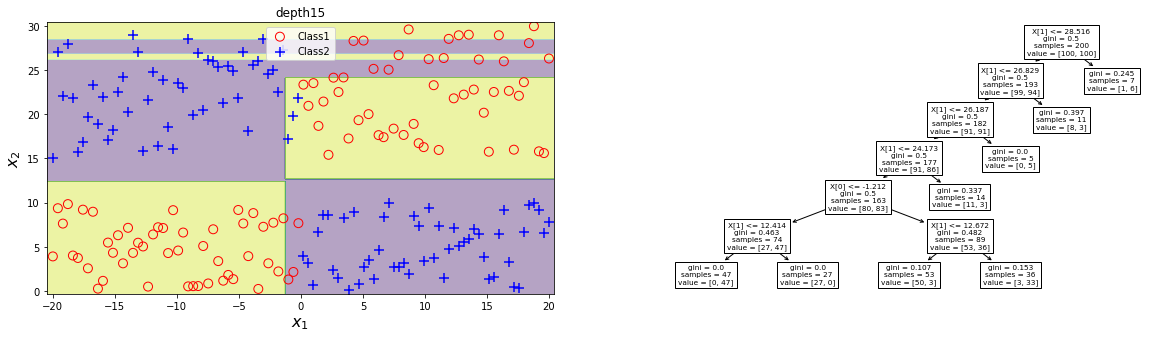

59 0.935


<ipython-input-10-b8d411288f06>:56: UserWarning: You passed a edgecolor/edgecolors ('b') for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(X1[y == 0], X2[y == 0],     facecolors='b',


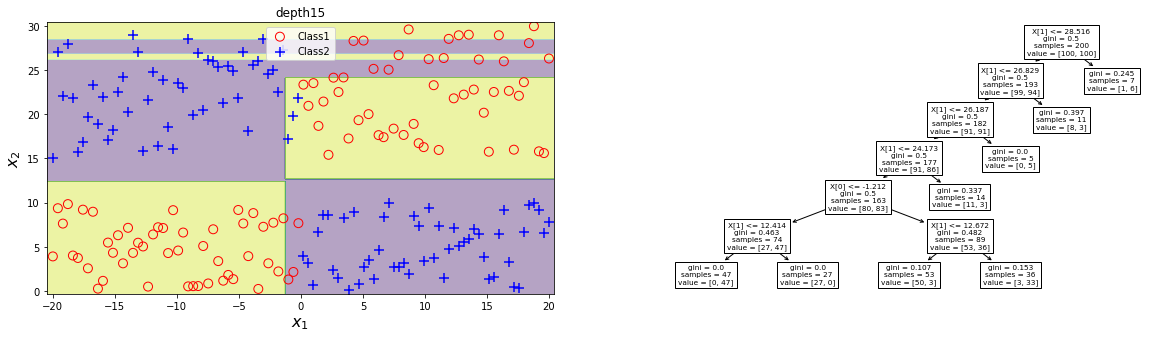

60 0.935


<ipython-input-10-b8d411288f06>:56: UserWarning: You passed a edgecolor/edgecolors ('b') for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(X1[y == 0], X2[y == 0],     facecolors='b',


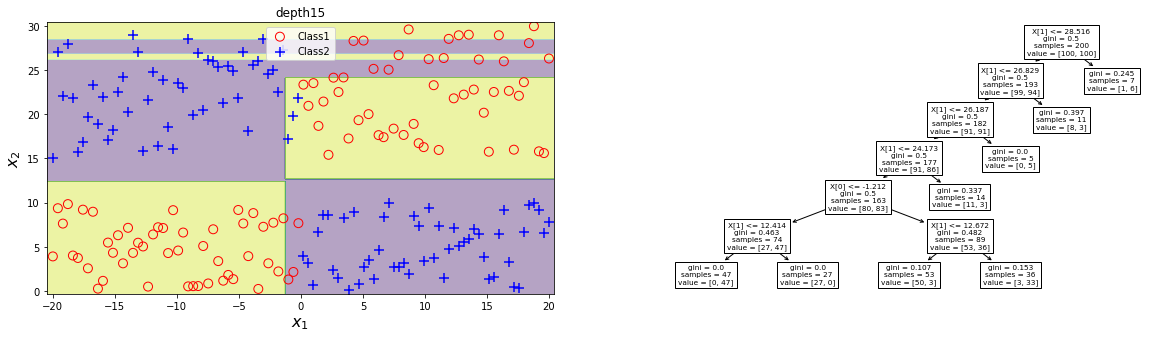

61 0.935


<ipython-input-10-b8d411288f06>:56: UserWarning: You passed a edgecolor/edgecolors ('b') for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(X1[y == 0], X2[y == 0],     facecolors='b',


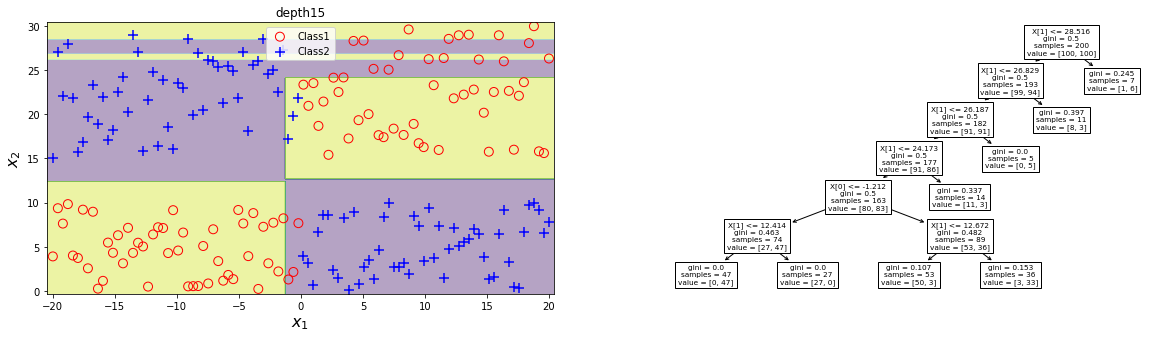

62 0.935


<ipython-input-10-b8d411288f06>:56: UserWarning: You passed a edgecolor/edgecolors ('b') for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(X1[y == 0], X2[y == 0],     facecolors='b',


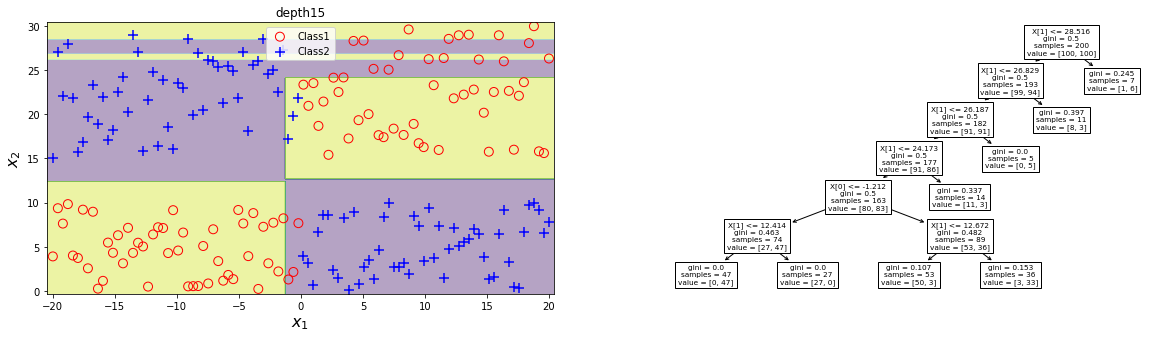

63 0.935


<ipython-input-10-b8d411288f06>:56: UserWarning: You passed a edgecolor/edgecolors ('b') for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(X1[y == 0], X2[y == 0],     facecolors='b',


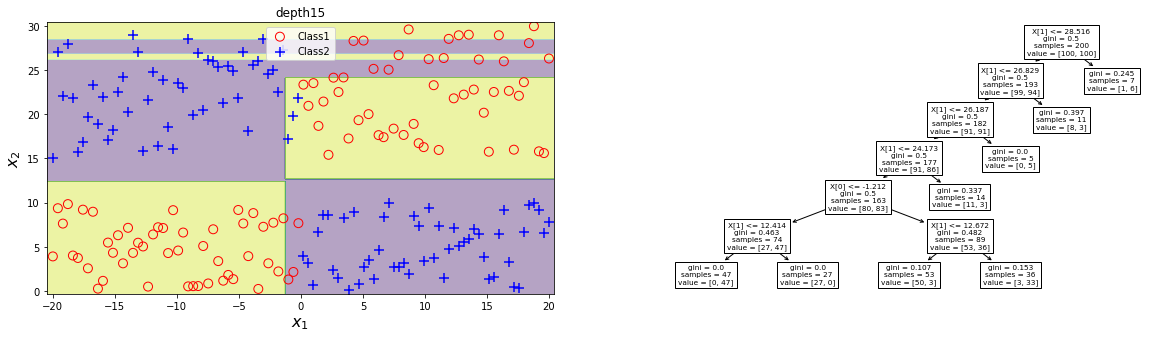

64 0.935


<ipython-input-10-b8d411288f06>:56: UserWarning: You passed a edgecolor/edgecolors ('b') for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(X1[y == 0], X2[y == 0],     facecolors='b',


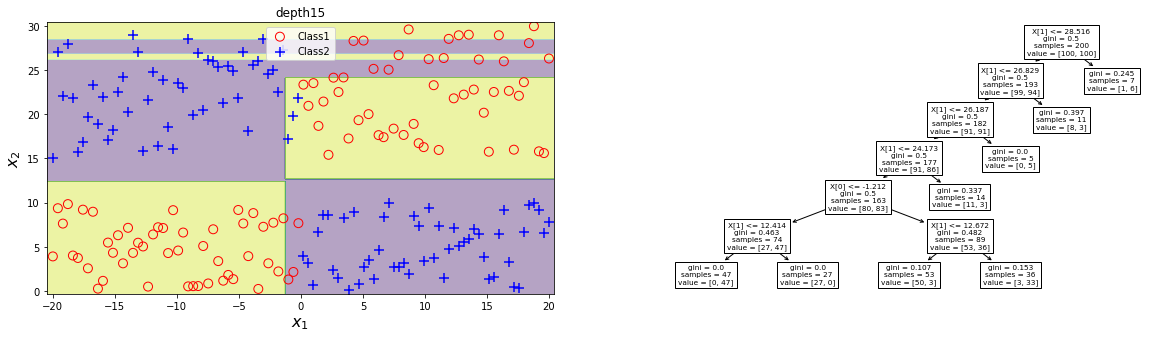

65 0.935


<ipython-input-10-b8d411288f06>:56: UserWarning: You passed a edgecolor/edgecolors ('b') for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(X1[y == 0], X2[y == 0],     facecolors='b',


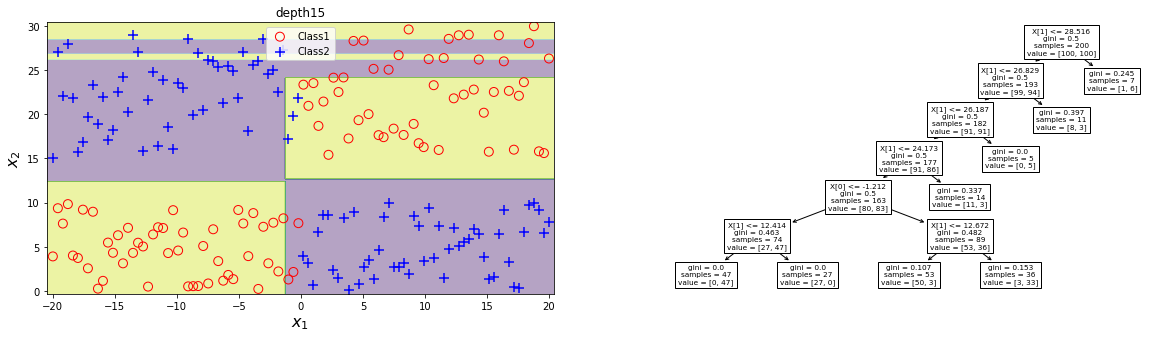

66 0.935


<ipython-input-10-b8d411288f06>:56: UserWarning: You passed a edgecolor/edgecolors ('b') for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(X1[y == 0], X2[y == 0],     facecolors='b',


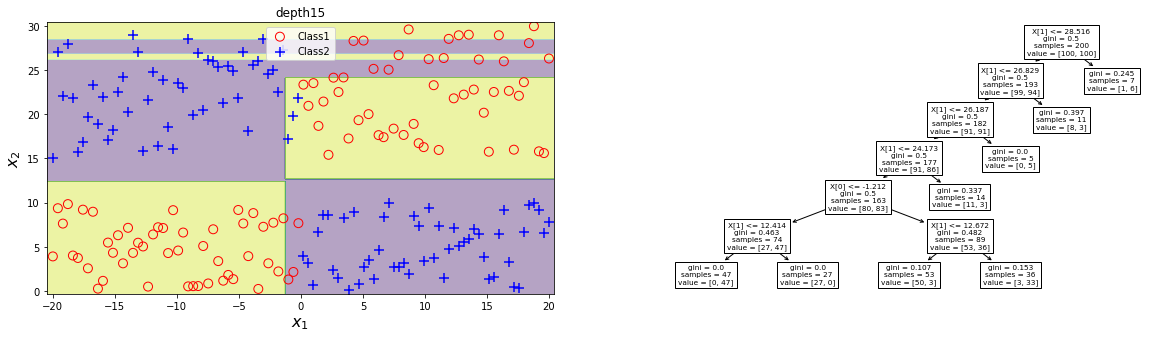

67 0.935


<ipython-input-10-b8d411288f06>:56: UserWarning: You passed a edgecolor/edgecolors ('b') for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(X1[y == 0], X2[y == 0],     facecolors='b',


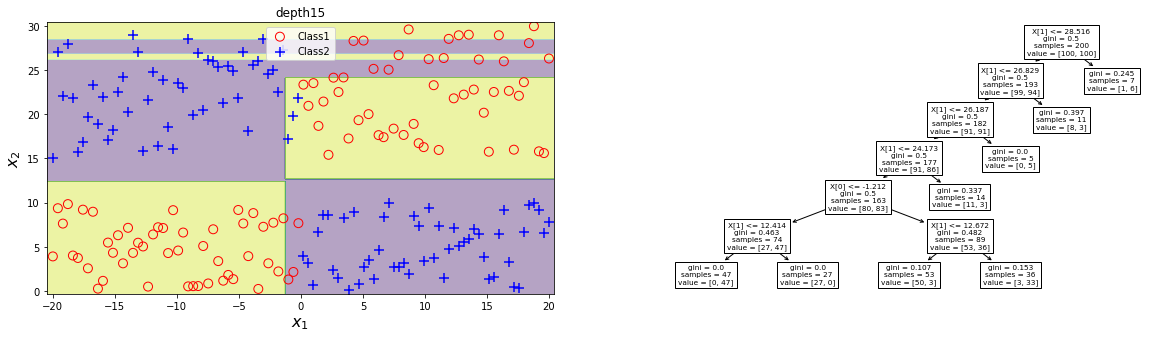

68 0.935


<ipython-input-10-b8d411288f06>:56: UserWarning: You passed a edgecolor/edgecolors ('b') for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(X1[y == 0], X2[y == 0],     facecolors='b',


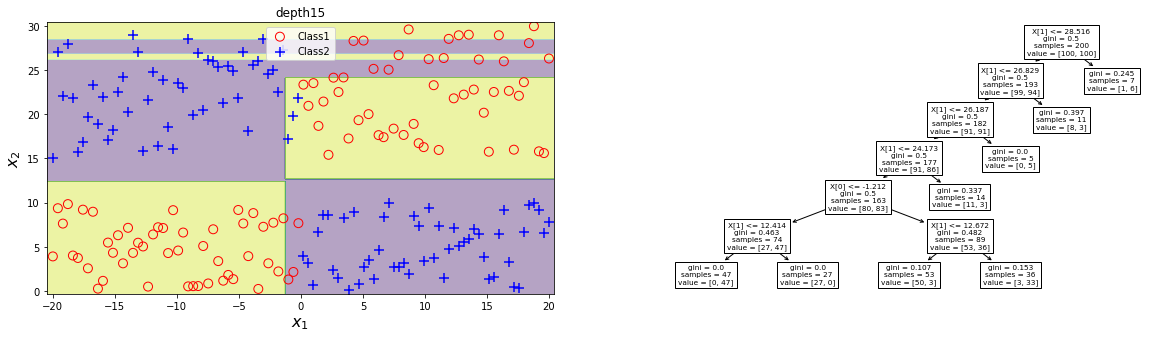

69 0.935


<ipython-input-10-b8d411288f06>:56: UserWarning: You passed a edgecolor/edgecolors ('b') for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(X1[y == 0], X2[y == 0],     facecolors='b',


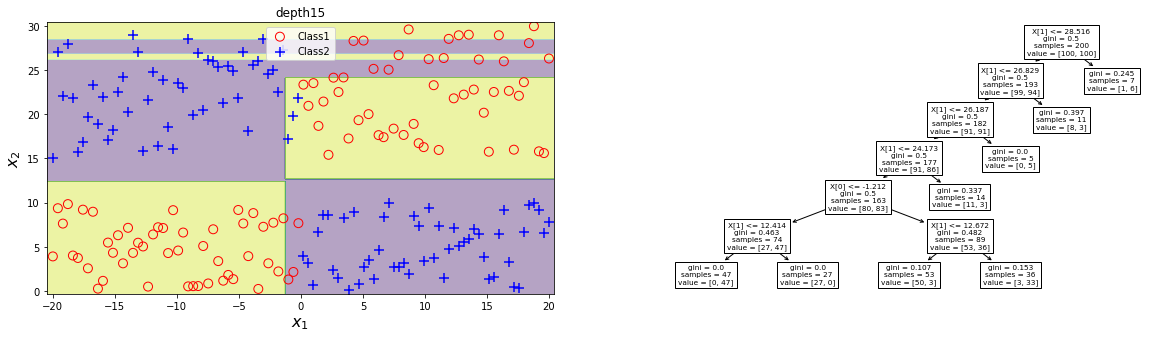

70 0.935


<ipython-input-10-b8d411288f06>:56: UserWarning: You passed a edgecolor/edgecolors ('b') for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(X1[y == 0], X2[y == 0],     facecolors='b',


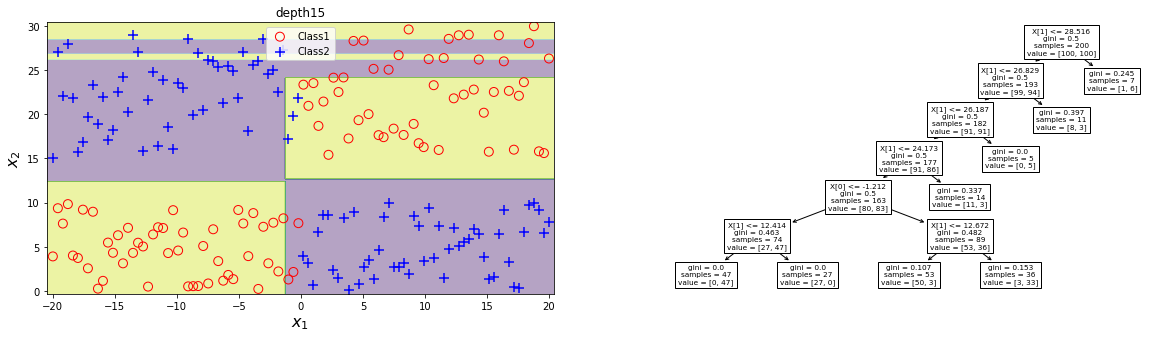

max_accuracy=0.955, max_depth=15, min_leaf=5, min_split=11, min_impurity=0.005


In [18]:
# to be able to change these and experiement easily
max_depths   = [15] 
min_leafs    = [5]                        
min_splits   = [i for i in range(2, 71)]                            
min_impurity = [0.005]
max_accuracy = 0
print(min_splits)
clf =[]
for d in max_depths:
    for f in min_leafs:
        for s in min_splits:
            for i in min_impurity:
                accuracy,clf = fit_plot_DT(max_depth=d, min_leaf=f, min_split=s, min_impurity= i)
                print(s, accuracy)
                fit_plot_DT(max_depth=d, min_leaf=f, min_split=s,min_impurity= i, plot=True)
                if accuracy >= max_accuracy: 
                    max_accuracy = accuracy
                    max_d    = d
                    min_f    = f
                    min_s    = s
                    min_i    = i
print('max_accuracy={}, max_depth={}, min_leaf={}, min_split={}, min_impurity={}'.format(
       max_accuracy,    max_d,        min_f,       min_s,        min_i))


### Final Optimal Tree Classifier

Finally the resultant tree can be established via the above optimal hyper parameters. Below we show the final tree and its boundaries.

0


<ipython-input-32-b8d411288f06>:56: UserWarning: You passed a edgecolor/edgecolors ('b') for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(X1[y == 0], X2[y == 0],     facecolors='b',


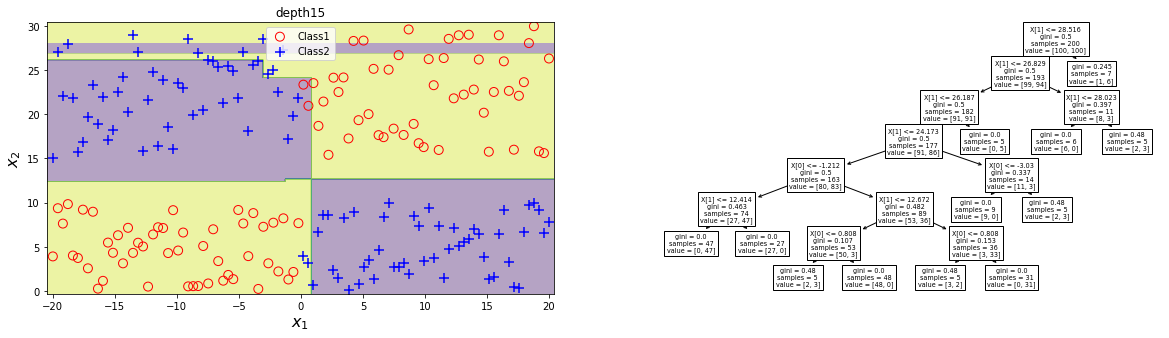

(0.955,
 DecisionTreeClassifier(max_depth=15, min_impurity_decrease=0.005,
                        min_samples_leaf=5, min_samples_split=10))

In [54]:
print(clf.get_depth())
fit_plot_DT(max_depth=max_d, min_leaf=min_f, min_split=min_s,min_impurity= min_i, plot=True)

### Your Turn to Try Something Out!

Note that the max_depth is not necessarily the depth that we ended up with in the tree. Since the other hyper parameters often cause the tree to stop growing. In fact max_depth has no effect in this case. Try to increase and decrease its value. It is your turn to try something out!

1. Split into Training and Testing. In all of the above we have not split the data into training and testing. This is not recommended you would need to implement a suitable splitting functionality and then train on the training set and test on the testing set.


2. Even when we split into testing training, the results are not very reliable since our dataset is small. We need to employ cross validations. Luckily sklearn provides this quite conveniently. You have just to implement it.  


3. Below we show how to do both cross validation and grid search in one go. Try to separate these if you want as an exercise. Bear in mind however that these are often performed together.


### The Task

Your task is to implement the Grid Search using sklearn libraries. Yes, there is a set of functions that you can directly call and they will do the job for you, :-)

The above implementation should give you a thorough idea of the optimisation process and what it entails. Check the following [example](https://scikit-learn.org/stable/auto_examples/model_selection/plot_multi_metric_evaluation.html#sphx-glr-auto-examples-model-selection-plot-multi-metric-evaluation-py) for an example.

The exercise implements a cross validation in the context of a decision trees.


In [40]:
X_train, X_out, y_train, y_out = train_test_split(X, y, test_size=0.20, random_state=42, stratify=y, shuffle=True)

In [41]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.model_selection import train_test_split



DT_GS = GridSearchCV(DecisionTreeClassifier(random_state=42),
                  param_grid={'min_samples_split': range(2, 40, 10),
                              'max_depth':         range(2, 20,  5),
                              'min_samples_leaf':  range(10,70, 10)},
                               scoring=make_scorer(accuracy_score), return_train_score=True)
DT_GS.fit(X_train, y_train)
results = DT_GS.cv_results_
print(results['mean_test_score'])

print(results['mean_test_score'].max())
print(results['std_test_score'].max())

[0.65625 0.65625 0.625   0.625   0.76875 0.76875 0.76875 0.76875 0.68125
 0.68125 0.68125 0.68125 0.575   0.575   0.575   0.575   0.45    0.45
 0.45    0.45    0.5125  0.5125  0.5125  0.5125  0.93125 0.93125 0.9
 0.8875  0.875   0.875   0.875   0.875   0.68125 0.68125 0.68125 0.68125
 0.575   0.575   0.575   0.575   0.45    0.45    0.45    0.45    0.5125
 0.5125  0.5125  0.5125  0.93125 0.93125 0.9     0.8875  0.875   0.875
 0.875   0.875   0.68125 0.68125 0.68125 0.68125 0.575   0.575   0.575
 0.575   0.45    0.45    0.45    0.45    0.5125  0.5125  0.5125  0.5125
 0.93125 0.93125 0.9     0.8875  0.875   0.875   0.875   0.875   0.68125
 0.68125 0.68125 0.68125 0.575   0.575   0.575   0.575   0.45    0.45
 0.45    0.45    0.5125  0.5125  0.5125  0.5125 ]
0.93125
0.22413026346301385


In [42]:
DT_GS.best_estimator_.score(X_out, y_out)

0.95

[[-20.0959596   -0.11089074]
 [-19.9959596   -0.11089074]
 [-19.8959596   -0.11089074]
 [-19.7959596   -0.11089074]
 [-19.6959596   -0.11089074]]
(121788, 2)
(306, 398)
(306, 398)


<ipython-input-43-0aebda6c8831>:24: UserWarning: You passed a edgecolor/edgecolors ('b') for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(X1[y_out == 0], X2[y_out == 0],     facecolors='b',


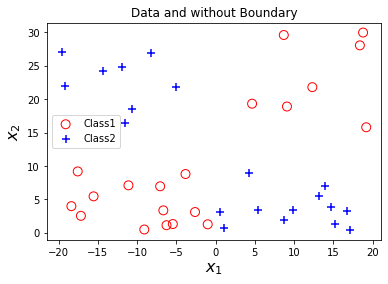

In [43]:
X1 = X_out[:,0]
X2 = X_out[:,1]

x_min, x_max = X1.min() - 0.5, X1.max() + 0.5
y_min, y_max = X2.min() - 0.5, X2.max() + 0.5

xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

X12 = np.c_[xx.ravel(), yy.ravel()]

print(X12[:5,:5])
print(X12.shape)
print(xx.shape)
print(yy.shape)
yy.shape[0]*yy.shape[1]

# Z = DT_GS.best_estimator_.predict(X_out)
# Z = Z.reshape(xx.shape)
# plt.contourf(xx, yy, Z, alpha=0.4) # comment this out to see the effect

plt.scatter(X1[y_out == 1], X2[y_out == 1],     facecolors='none',
           marker='o', edgecolor='r', s=80, label='Class1')
plt.scatter(X1[y_out == 0], X2[y_out == 0],     facecolors='b',
           marker='+', edgecolor='b', s=80, label='Class2')

plt.title('Data and without Boundary')
plt.xlabel('$x_1$', fontsize=16)
plt.ylabel('$x_2$', fontsize=16)
plt.legend()